## Research : Encephalopathies and Delirium  in CKG
### Pub_3.ED Group_comparisons

#### I. Data Exploration :

#### II. ED Group Comparisons:

_Soo Kyung Bae (Scarlett : K19071757)MSc<br/>
Department of Biostatistics and Health Informatics<br/>
Institute of Psychiatry, Psychology and Neuroscience<br/>
King's College London<br/>_

_Soo Kyung Bae(Scarlett), Ph.D. Student<br/>
Dept. of Integrated Medicine(Major in Digital Healthcare)<br/>
Yonsei University College of Medicine<br/>_

In [1]:
import os
os.getcwd()

'/home/ubuntu/Scarlett/Final PG'

### I. Data Exploration :

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_DIR = "/home/ubuntu/Scarlett/Output_F/"

In [4]:

# import : ED_uns_p_all_cuis
import pandas as pd
ED_patient_cohortF= pd.read_csv(DATA_DIR + "III_17.ED_patient_cohortFinal.csv")

# ED patiens extracted from annotated cui_ids from unstructured text info.(clinical notes)
#output= pd.read_csv('/home/ubuntu/Scarlett/Output_F/III_18.ED_patient_group_output.csv')

# ED patients group : NN, NY, YN, YY, Mixed
output2 = pd.read_csv(DATA_DIR + "III_18_2.ED_patient_group_output2.csv")

# ED patiens all cuis descriptions
#df2.to_csv('/home/ubuntu/Scarlett/Output_F/III_21.F.ED_patient_cui_type_var_summary.csv', index=True)
df2 = pd.read_csv(DATA_DIR + "III_21.F.ED_patient_cui_type_var_summary.csv")


# ED patients ED cuis 
#df3.to_csv('/home/ubuntu/Scarlett/Output_F/III_20.2.F ED_patient_EDcui_var_summary.csv', index=True)
df_ed= pd.read_csv(DATA_DIR + "III_20.2.F ED_patient_EDcui_var_summary.csv")


In [6]:
# ED patiens extracted from annotated cui_ids from unstructured text info.(clinical notes)
# subject_id	hadm_id	ED_icd	ED_notes	icd_notes	YY	NN	YN	NY
#output.to_csv('/home/ubuntu/Scarlett/Output_F/III_18.ED_patient_group_output.csv', index=True)

output= pd.read_csv(DATA_DIR + "III_18.ED_patient_group_output.csv")

In [7]:
ED_patient_cohortF.head()
len(ED_patient_cohortF)

651047

In [8]:
output.head()

,Unnamed: 0,subject_id,hadm_id,ED_icd,ED_notes,icd_notes,YY,NN,YN,NY
0,0,2,163353,0,0,NN,0.0,1.0,0.0,0.0
1,1,3,145834,0,9,NY,0.0,0.0,0.0,1.0
2,2,4,185777,0,0,NN,0.0,1.0,0.0,0.0
3,3,5,178980,0,0,NN,0.0,1.0,0.0,0.0
4,4,6,107064,0,0,NN,0.0,1.0,0.0,0.0


In [9]:
output2.head()

,Unnamed: 0,index,subject_id,hadm_id,YY,NN,YN,NY,ED_G
0,0,0,2,1,0.0,1.0,0.0,0.0,NN
1,1,1,3,1,0.0,0.0,0.0,1.0,NY
2,2,2,4,1,0.0,1.0,0.0,0.0,NN
3,3,3,5,1,0.0,1.0,0.0,0.0,NN
4,4,4,6,1,0.0,1.0,0.0,0.0,NN


In [ ]:
# merge ED_patient_cohortF, output2 to the below check : age, staydays,etc...###

In [10]:
# merge icd_notes with ED_patient_cohortF
ED_patient_cohortF_icd_notes = pd.merge(ED_patient_cohortF, output2[['subject_id','YY','NN','YN','NY','ED_G']], on="subject_id")

In [11]:
print(len(ED_patient_cohortF_icd_notes))
ED_patient_cohortF_icd_notes.head()

651047


,Unnamed: 0,row_id,seq_num,icd9_code,row_id.1,subject_id,hadm_id,admittime,dischtime,deathtime,...,LOSGroup,age_bucket,ethnicity_G,ED_notes,ED_icd,YY,NN,YN,NY,ED_G
0,0,1488,1.0,53100,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,NaN,...,< 10,>70,WHITE,0,0,0.0,1.0,0.0,1.0,mixed
1,1,1489,2.0,41071,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,NaN,...,< 10,>70,WHITE,0,0,0.0,1.0,0.0,1.0,mixed
2,2,1490,3.0,2859,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,NaN,...,< 10,>70,WHITE,0,0,0.0,1.0,0.0,1.0,mixed
3,3,1491,4.0,41401,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,NaN,...,< 10,>70,WHITE,0,0,0.0,1.0,0.0,1.0,mixed
4,4,1492,5.0,725,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,NaN,...,< 10,>70,WHITE,0,0,0.0,1.0,0.0,1.0,mixed


In [12]:

# sid, admin Id, ED idc9 included?, #of category, average # of cuis per category,
out=ED_patient_cohortF_icd_notes[['ED_G','subject_id','hadm_id','admin_age','stay_days']].groupby(['ED_G','subject_id','hadm_id']).agg({"admin_age":"mean", "stay_days":"mean"})  
out=pd.DataFrame(out).reset_index()
out

,ED_G,subject_id,hadm_id,admin_age,stay_days
0,NN,2,163353,0.00,4.0
1,NN,4,185777,47.84,7.0
2,NN,5,178980,0.00,2.0
3,NN,6,107064,65.94,16.0
4,NN,7,118037,0.00,4.0
...,...,...,...,...,...
58971,mixed,99923,164914,54.39,8.0
58972,mixed,99923,192053,54.61,10.0
58973,mixed,99982,112748,65.26,7.0
58974,mixed,99982,151454,65.16,10.0


In [13]:
print(output.shape)
print(out.shape)

(58976, 10)
(58976, 5)


In [14]:
# merge : output and out
# merge icd_notes with ED_patient_cohortF
output_out = pd.merge(output, out[['ED_G','hadm_id','admin_age','stay_days']], on="hadm_id")

In [15]:
output_out.shape

(58976, 13)

In [16]:
output_out.head()

,Unnamed: 0,subject_id,hadm_id,ED_icd,ED_notes,icd_notes,YY,NN,YN,NY,ED_G,admin_age,stay_days
0,0,2,163353,0,0,NN,0.0,1.0,0.0,0.0,NN,0.00,4.0
1,1,3,145834,0,9,NY,0.0,0.0,0.0,1.0,NY,76.52,11.0
2,2,4,185777,0,0,NN,0.0,1.0,0.0,0.0,NN,47.84,7.0
3,3,5,178980,0,0,NN,0.0,1.0,0.0,0.0,NN,0.00,2.0
4,4,6,107064,0,0,NN,0.0,1.0,0.0,0.0,NN,65.94,16.0


In [17]:
out.to_csv(DATA_DIR + "III_22.F.ED_patient_summary.csv", index=True)

In [18]:
output_out=output_out.sort_values(by=['subject_id', 'admin_age'])

In [19]:
#df['Auction_Rank'] = df.groupby('hadm_id)['Bid_Price'].rank(ascending=False) #ascending=True
output_out['order_adm'] = output_out.groupby('subject_id')['admin_age'].rank(method='first').astype(int)

In [20]:
output_out.head(20)

,Unnamed: 0,subject_id,hadm_id,ED_icd,ED_notes,icd_notes,YY,NN,YN,NY,ED_G,admin_age,stay_days,order_adm
0,0,2,163353,0,0,NN,0.0,1.0,0.0,0.0,NN,0.00,4.0,1
1,1,3,145834,0,9,NY,0.0,0.0,0.0,1.0,NY,76.52,11.0,1
2,2,4,185777,0,0,NN,0.0,1.0,0.0,0.0,NN,47.84,7.0,1
3,3,5,178980,0,0,NN,0.0,1.0,0.0,0.0,NN,0.00,2.0,1
4,4,6,107064,0,0,NN,0.0,1.0,0.0,0.0,NN,65.94,16.0,1
5,5,7,118037,0,0,NN,0.0,1.0,0.0,0.0,NN,0.00,4.0,1
6,6,8,159514,0,0,NN,0.0,1.0,0.0,0.0,NN,0.00,4.0,1
7,7,9,150750,0,6,NY,0.0,0.0,0.0,1.0,NY,41.79,5.0,1
8,8,10,184167,0,0,NN,0.0,1.0,0.0,0.0,NN,0.00,8.0,1
9,9,11,194540,0,0,NN,0.0,1.0,0.0,0.0,NN,50.15,25.0,1


In [21]:
# for mixed admission type in order : pivot
df_output_out= output_out.pivot(index=['ED_G','subject_id'], columns='order_adm', values='icd_notes')

In [22]:
df_output_out.head()

order_adm        1    2    3    4    5    6    7    8    9    10  ...   33  \
ED_G subject_id                                                   ...        
NN   2           NN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
     4           NN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
     5           NN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
     6           NN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
     7           NN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   

order_adm         34   35   36   37   38   39   40   41   42  
ED_G subject_id                                               
NN   2           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
     4           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
     5           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
     6           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
     7           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 42 columns]

In [25]:
#df.fillna()
#df_output_out=df_output_out.fillna('')
df_output_out=pd.DataFrame(df_output_out).reset_index()
df_output_out.head()

order_adm,ED_G,subject_id,1,2,3,4,5,6,7,8,...,33,34,35,36,37,38,39,40,41,42
0,NN,2,NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NN,4,NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NN,5,NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NN,6,NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NN,7,NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_output_out.shape

(46520, 44)

In [27]:
df_output_out[1]

0        NN
1        NN
2        NN
3        NN
4        NN
         ..
46515    NY
46516    NN
46517    YY
46518    NY
46519    NN
Name: 1, Length: 46520, dtype: object

In [28]:
df_output_out.columns[2:]

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42],
      dtype='object', name='order_adm')

In [29]:
df_output_out['combined2']=df_output_out[df_output_out.columns[2:]].apply(lambda x :'_'.join(x.dropna().astype(str)),axis=1 )

In [30]:
df_output_out.columns[2:]

Index([          1,           2,           3,           4,           5,
                 6,           7,           8,           9,          10,
                11,          12,          13,          14,          15,
                16,          17,          18,          19,          20,
                21,          22,          23,          24,          25,
                26,          27,          28,          29,          30,
                31,          32,          33,          34,          35,
                36,          37,          38,          39,          40,
                41,          42, 'combined2'],
      dtype='object', name='order_adm')

In [99]:
#cols = df_output_out.columns[2:]
#df_output_out['combined']=df_output_out[cols].apply(lambda x :'_'.join(x.dropna().astype(str)),axis=1 )
#df["keywords_all"] = df[cols].apply(lambda x: ','.join(x.dropna()), axis=1)

In [100]:
#df_output_out['combined'].head()

0    NN_NN
1    NN_NN
2    NN_NN
3    NN_NN
4    NN_NN
Name: combined, dtype: object

In [31]:
df_output_out['combined2'].head()

0    NN
1    NN
2    NN
3    NN
4    NN
Name: combined2, dtype: object

In [32]:
df_output_out.head()

order_adm,ED_G,subject_id,1,2,3,4,5,6,7,8,...,34,35,36,37,38,39,40,41,42,combined2
0,NN,2,NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NN
1,NN,4,NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NN
2,NN,5,NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NN
3,NN,6,NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NN
4,NN,7,NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NN


In [33]:
# Aggregate data (ED_icd and ED_notes) by subject_id
df_output_out2=df_output_out[['ED_G','combined2','subject_id',]].groupby(['ED_G','combined2'], as_index=False).agg({"subject_id":"count"})
df_output_out2.head()

,ED_G,combined2,subject_id
0,NN,NN,16709
1,NN,NN_NN,857
2,NN,NN_NN_NN,98
3,NN,NN_NN_NN_NN,20
4,NN,NN_NN_NN_NN_NN,1


In [34]:
df_output_out2.ED_G.value_counts()

mixed    463
NY        10
NN         7
YY         5
YN         1
Name: ED_G, dtype: int64

In [35]:
print(output_out.shape)
output_out.head()

(58976, 14)


,Unnamed: 0,subject_id,hadm_id,ED_icd,ED_notes,icd_notes,YY,NN,YN,NY,ED_G,admin_age,stay_days,order_adm
0,0,2,163353,0,0,NN,0.0,1.0,0.0,0.0,NN,0.00,4.0,1
1,1,3,145834,0,9,NY,0.0,0.0,0.0,1.0,NY,76.52,11.0,1
2,2,4,185777,0,0,NN,0.0,1.0,0.0,0.0,NN,47.84,7.0,1
3,3,5,178980,0,0,NN,0.0,1.0,0.0,0.0,NN,0.00,2.0,1
4,4,6,107064,0,0,NN,0.0,1.0,0.0,0.0,NN,65.94,16.0,1


In [36]:
df_output_out.head()
df_output_out.shape

(46520, 45)

In [37]:
df_output_out.head()

order_adm,ED_G,subject_id,1,2,3,4,5,6,7,8,...,34,35,36,37,38,39,40,41,42,combined2
0,NN,2,NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NN
1,NN,4,NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NN
2,NN,5,NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NN
3,NN,6,NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NN
4,NN,7,NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NN


In [38]:
# merge : output_out,df_output_out2
#output_out = pd.merge(output, out[['ED_G','hadm_id','admin_age','stay_days']], on="hadm_id")
# merge combined2
output_out_mixed = pd.merge(output_out[['subject_id','hadm_id','ED_G','admin_age','stay_days','order_adm' ]], df_output_out, on="subject_id", how='left')

In [39]:
print(output_out_mixed.shape)
output_out_mixed.head()

(58976, 50)


,subject_id,hadm_id,ED_G_x,admin_age,stay_days,order_adm,ED_G_y,1,2,3,...,34,35,36,37,38,39,40,41,42,combined2
0,2,163353,NN,0.00,4.0,1,NN,NN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NN
1,3,145834,NY,76.52,11.0,1,NY,NY,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY
2,4,185777,NN,47.84,7.0,1,NN,NN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NN
3,5,178980,NN,0.00,2.0,1,NN,NN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NN
4,6,107064,NN,65.94,16.0,1,NN,NN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NN


In [40]:
output_out_mixed=output_out_mixed[['subject_id','hadm_id','ED_G_x','admin_age','stay_days','order_adm','combined2' ]]

In [41]:
output_out_mixed.head()

,subject_id,hadm_id,ED_G_x,admin_age,stay_days,order_adm,combined2
0,2,163353,NN,0.00,4.0,1,NN
1,3,145834,NY,76.52,11.0,1,NY
2,4,185777,NN,47.84,7.0,1,NN
3,5,178980,NN,0.00,2.0,1,NN
4,6,107064,NN,65.94,16.0,1,NN


In [42]:
# Using + operator to combine two columns
output_out_mixed['ED_G_combined']=output_out_mixed['ED_G_x'].astype(str) +"-"+ output_out_mixed["combined2"]

In [43]:
output_out_mixed.head()

,subject_id,hadm_id,ED_G_x,admin_age,stay_days,order_adm,combined2,ED_G_combined
0,2,163353,NN,0.00,4.0,1,NN,NN-NN
1,3,145834,NY,76.52,11.0,1,NY,NY-NY
2,4,185777,NN,47.84,7.0,1,NN,NN-NN
3,5,178980,NN,0.00,2.0,1,NN,NN-NN
4,6,107064,NN,65.94,16.0,1,NN,NN-NN


In [44]:
output_out_mixed.to_csv(DATA_DIR + "III_22.F.output_out_mixed.csv", index=True)

#### I.1 Admission information + ED group

In [45]:
import pandas as pd
ED_patient_cohortF= pd.read_csv(DATA_DIR + "III_17.ED_patient_cohortFinal.csv")

In [3]:
import pandas as pd
output_out_mixed= pd.read_csv(DATA_DIR + "III_22.F.output_out_mixed.csv")

In [4]:
output_out_mixed.head()

,Unnamed: 0,subject_id,hadm_id,ED_G_x,admin_age,stay_days,order_adm,combined2,ED_G_combined
0,0,2,163353,NN,0.00,4.0,1,NN,NN-NN
1,1,3,145834,NY,76.52,11.0,1,NY,NY-NY
2,2,4,185777,NN,47.84,7.0,1,NN,NN-NN
3,3,5,178980,NN,0.00,2.0,1,NN,NN-NN
4,4,6,107064,NN,65.94,16.0,1,NN,NN-NN


In [5]:
data=output_out_mixed

In [6]:
# age median
# Kruskal-Wallis Test : NY, NN, YY ,mixed
# select data : # of icd9 per admission

p1=data.loc[(data['ED_G_x']== 'NY'), ['admin_age']]
#p2=data.loc[(data['ED_G']== 'YY'), ['adm_cnt']]
p2=data.loc[(data['ED_G_x'].isin (['YY','YN'])), ['admin_age']]
p3=data.loc[(data['ED_G_x']== 'NN'), ['admin_age']]
p4=data.loc[(data['ED_G_x']== 'mixed'), ['admin_age']]


from scipy import stats

#perform Kruskal-Wallis Test 
print(stats.kruskal(p1, p2, p3,p4))

#perform Kruskal-Wallis Test 
stats.kruskal(p1, p2)

KruskalResult(statistic=array([5484.26081423]), pvalue=array([0.]))


KruskalResult(statistic=array([13.33554901]), pvalue=array([0.00026042]))

In [10]:
# age IQR

import numpy as np
import pandas as pd
from scipy import stats
#calculate interquartile range of values in the 'points' colum# of icd9 per admission:# of icd9 per admission
#q75, q25 = np.percentile(df['points'], [75 ,25])

q75_1, q50_1, q25_1 = np.percentile(data.loc[(data['ED_G_x']== 'NY'), ['admin_age']], [75, 50, 25])
#q75_2, q50_2, q25_2 = np.percentile(data.loc[(data['ED_G']== 'YY'), ['adm_cnt']], [75, 50, 25])
q75_2, q50_2, q25_2 = np.percentile(data.loc[(data['ED_G_x'].isin (['YY','YN'])), ['admin_age']], [75, 50, 25])
q75_3, q50_3, q25_3 = np.percentile(data.loc[(data['ED_G_x']== 'NN'), ['admin_age']], [75, 50, 25])
q75_4, q50_4, q25_4 = np.percentile(data.loc[(data['ED_G_x']== 'mixed'), ['admin_age']], [75, 50, 25])
iqr_1 = q75_1 - q25_1
iqr_2 = q75_2 - q25_2
iqr_3 = q75_3 - q25_3
iqr_4 = q75_4 - q25_4
#NY
print("NY IQR :",round(iqr_1,2),",Q75 :",round(q75_1,2),",Q50 :",round(q50_1,2),",Q25 :",round(q25_1,2))
#YY
print("YY+YN IQR :",round(iqr_2,2),",Q75 :",round(q75_2,2),",Q50 :",round(q50_2,2),",Q25 :",round(q25_2,2))
#NN
print("NN IQR :",round(iqr_3,2),",Q75 :",round(q75_3,2),",Q50 :",round(q50_3,2),",Q25 :",round(q25_3,2))

#mixed-NY_YY : round(pb.pvalue,3)
print("mixed IQR :",round(iqr_4,2),",Q75 :",round(q75_4,2),",Q50 :",round(q50_4,2),",Q25 :",round(q25_4,2))


NY IQR : 28.88 ,Q75 : 78.9 ,Q50 : 66.05 ,Q25 : 50.02
YY+YN IQR : 26.94 ,Q75 : 79.2 ,Q50 : 66.23 ,Q25 : 52.26
NN IQR : 68.22 ,Q75 : 68.22 ,Q50 : 49.94 ,Q25 : 0.0
mixed IQR : 23.56 ,Q75 : 76.12 ,Q50 : 64.54 ,Q25 : 52.56


In [47]:
ED_patient_cohortF.head()

,Unnamed: 0,row_id,seq_num,icd9_code,row_id.1,subject_id,hadm_id,admittime,dischtime,deathtime,...,dod_ssn,expire_flag,admin_age,stay_days,AgeGroup,LOSGroup,age_bucket,ethnicity_G,ED_notes,ED_icd
0,0,1488,1.0,53100,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,NaN,...,2196-09-29 00:00:00,1,90.0,5.0,>=80,< 10,>70,WHITE,0,0
1,1,1489,2.0,41071,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,NaN,...,2196-09-29 00:00:00,1,90.0,5.0,>=80,< 10,>70,WHITE,0,0
2,2,1490,3.0,2859,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,NaN,...,2196-09-29 00:00:00,1,90.0,5.0,>=80,< 10,>70,WHITE,0,0
3,3,1491,4.0,41401,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,NaN,...,2196-09-29 00:00:00,1,90.0,5.0,>=80,< 10,>70,WHITE,0,0
4,4,1492,5.0,725,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,NaN,...,2196-09-29 00:00:00,1,90.0,5.0,>=80,< 10,>70,WHITE,0,0


In [48]:
#output_out_mixed
# merge icd_notes with ED_patient_cohortF
#ED_patient_cohortF_combined2 = pd.merge(ED_patient_cohortF, output_out_mixed[['subject_id','ED_G_x','combined2']], on="hadm_id", how="left")
ED_patient_cohortF_combined2 = pd.merge(ED_patient_cohortF, output_out_mixed, on="hadm_id", how="left")

In [49]:
print(ED_patient_cohortF_combined2.shape)
ED_patient_cohortF_combined2.head()

(651047, 45)


,Unnamed: 0_x,row_id,seq_num,icd9_code,row_id.1,subject_id_x,hadm_id,admittime,dischtime,deathtime,...,ED_notes,ED_icd,Unnamed: 0_y,subject_id_y,ED_G_x,admin_age_y,stay_days_y,order_adm,combined2,ED_G_combined
0,0,1488,1.0,53100,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,NaN,...,0,0,153,112,mixed,90.0,5.0,2,NY_NN,mixed-NY_NN
1,1,1489,2.0,41071,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,NaN,...,0,0,153,112,mixed,90.0,5.0,2,NY_NN,mixed-NY_NN
2,2,1490,3.0,2859,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,NaN,...,0,0,153,112,mixed,90.0,5.0,2,NY_NN,mixed-NY_NN
3,3,1491,4.0,41401,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,NaN,...,0,0,153,112,mixed,90.0,5.0,2,NY_NN,mixed-NY_NN
4,4,1492,5.0,725,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,NaN,...,0,0,153,112,mixed,90.0,5.0,2,NY_NN,mixed-NY_NN


In [ ]:
# Select YN patients

In [50]:
ED_patient_cohortF_combined2.columns

Index(['Unnamed: 0_x', 'row_id', 'seq_num', 'icd9_code', 'row_id.1',
       'subject_id_x', 'hadm_id', 'admittime', 'dischtime', 'deathtime',
       'admission_type', 'admission_location', 'discharge_location',
       'insurance', 'language', 'religion', 'marital_status', 'ethnicity',
       'edregtime', 'edouttime', 'diagnosis', 'hospital_expire_flag',
       'has_chartevents_data', 'gender', 'dob', 'dod', 'dod_hosp', 'dod_ssn',
       'expire_flag', 'admin_age_x', 'stay_days_x', 'AgeGroup', 'LOSGroup',
       'age_bucket', 'ethnicity_G', 'ED_notes', 'ED_icd', 'Unnamed: 0_y',
       'subject_id_y', 'ED_G_x', 'admin_age_y', 'stay_days_y', 'order_adm',
       'combined2', 'ED_G_combined'],
      dtype='object')

In [51]:
ED_patient_cohortF_combined2.ED_G_x.value_counts

<bound method IndexOpsMixin.value_counts of 0         mixed
1         mixed
2         mixed
3         mixed
4         mixed
          ...  
651042       NN
651043       NN
651044       NN
651045       NN
651046       NN
Name: ED_G_x, Length: 651047, dtype: object>

In [52]:
ED_G_YN= ED_patient_cohortF_combined2.loc[(ED_patient_cohortF_combined2['ED_G_x'] == 'YN')]
ED_G_YN.head()

,Unnamed: 0_x,row_id,seq_num,icd9_code,row_id.1,subject_id_x,hadm_id,admittime,dischtime,deathtime,...,ED_notes,ED_icd,Unnamed: 0_y,subject_id_y,ED_G_x,admin_age_y,stay_days_y,order_adm,combined2,ED_G_combined
17022,17022,69330,1.0,1890,7538,6173,147383,2118-09-08 07:15:00,2118-09-18 13:03:00,NaN,...,0,0,7537,6173,YN,52.84,10.0,1,YN,YN-YN
17023,17023,69331,2.0,19889,7538,6173,147383,2118-09-08 07:15:00,2118-09-18 13:03:00,NaN,...,0,0,7537,6173,YN,52.84,10.0,1,YN,YN-YN
17024,17024,69332,3.0,5849,7538,6173,147383,2118-09-08 07:15:00,2118-09-18 13:03:00,NaN,...,0,0,7537,6173,YN,52.84,10.0,1,YN,YN-YN
17025,17025,69333,4.0,2851,7538,6173,147383,2118-09-08 07:15:00,2118-09-18 13:03:00,NaN,...,0,0,7537,6173,YN,52.84,10.0,1,YN,YN-YN
17026,17026,69334,5.0,2762,7538,6173,147383,2118-09-08 07:15:00,2118-09-18 13:03:00,NaN,...,0,0,7537,6173,YN,52.84,10.0,1,YN,YN-YN


In [53]:
#ED_G_YN : icd9 codes
ED_G_YN.to_csv(DATA_DIR + "III_22_F.ED_G_YN_icd9codes.csv", index=True)

In [54]:
# # oficd_9 codes
mixd_dist_icd9=ED_patient_cohortF_combined2[['ED_G_x','combined2','ED_G_combined','subject_id_x', 'hadm_id','icd9_code']].groupby(['ED_G_x','combined2','ED_G_combined','subject_id_x']).agg({"hadm_id":"nunique","icd9_code":"count"}) 

In [55]:
mixd_dist_icd9=pd.DataFrame(mixd_dist_icd9).reset_index()
mixd_dist_icd9.head()

,ED_G_x,combined2,ED_G_combined,subject_id_x,hadm_id,icd9_code
0,NN,NN,NN-NN,2,1,3
1,NN,NN,NN-NN,4,1,9
2,NN,NN,NN-NN,5,1,3
3,NN,NN,NN-NN,6,1,8
4,NN,NN,NN-NN,7,1,3


In [56]:
mixd_dist_icd9.shape

(46520, 6)

In [57]:
mixd_dist_icd9.rename(columns={'ED_G_x': 'ED_G', 'subject_id_x': 'subject_id', 'hadm_id': 'adm_cnt'}, inplace=True)

In [58]:
mixd_dist_icd9.ED_G.value_counts()

NY       20906
NN       17687
mixed     4421
YY        3293
YN         213
Name: ED_G, dtype: int64

### II. ED Group Comparisons:

The Kruskal Wallis test is used when you have one independent variable with two or more levels and an ordinal dependent variable. In other words, it is the non-parametric version of ANOVA and a generalized form of the Mann-Whitney test method since it permits 2 or more groups.  We will use the same data file as the one way ANOVA example  and the same variables, but we will not assume that write is a normally distributed interval variable.

A Kruskal-Wallis Test is used to determine whether or not there is a statistically significant difference between the medians of three or more independent groups. It is considered to be the non-parametric equivalent of the One-Way ANOVA.

The Kruskal-Wallis Test uses the following null and alternative hypotheses:
The null hypothesis (H0): The median is equal across all groups.
The alternative hypothesis: (Ha): The median is not equal across all groups.

Since this p-value is less than 0.05, we can reject the null hypothesis that the median is the same for all three fertilizers. We have sufficient evidence to conclude that it leads to statistically significant differences


In [59]:
# Kruskal-Wallis Test : NY, NN, YY ,mixed
data=mixd_dist_icd9
# select data : # of icd9 per admission

p1=data.loc[(data['ED_G']== 'NY'), ['adm_cnt']]
#p2=data.loc[(data['ED_G']== 'YY'), ['adm_cnt']]
p2=data.loc[(data['ED_G'].isin (['YY','YN'])), ['adm_cnt']]
p3=data.loc[(data['ED_G']== 'NN'), ['adm_cnt']]
p4=data.loc[(data['ED_G']== 'mixed'), ['adm_cnt']]


from scipy import stats

#perform Kruskal-Wallis Test 
print(stats.kruskal(p1, p2, p3,p4))

#perform Kruskal-Wallis Test 
stats.kruskal(p1, p2, p3)

KruskalResult(statistic=26260.940187759476, pvalue=0.0)


KruskalResult(statistic=262.09367077453913, pvalue=1.2220318367427863e-57)

In [60]:
pb1=stats.kruskal(p1, p2, p3,p4)
print(pb1)
round(pb1.pvalue,3)

KruskalResult(statistic=26260.940187759476, pvalue=0.0)


0.0

In [61]:
pb=stats.kruskal(p1, p2, p3)
print(pb)
round(pb.pvalue,3)

KruskalResult(statistic=262.09367077453913, pvalue=1.2220318367427863e-57)


0.0

the test statistic is 262.10 and the corresponding p-value is 0.0. Since this p-value is less than 0.05, we can reject the null hypothesis that the no. of admissions is the same for all three groups. We have sufficient evidence to conclude that no. of admissions are statistically significant different among ED group.

In [62]:
mixd_dist_icd9

,ED_G,combined2,ED_G_combined,subject_id,adm_cnt,icd9_code
0,NN,NN,NN-NN,2,1,3
1,NN,NN,NN-NN,4,1,9
2,NN,NN,NN-NN,5,1,3
3,NN,NN,NN-NN,6,1,8
4,NN,NN,NN-NN,7,1,3
...,...,...,...,...,...,...
46515,mixed,YY_YY_NY_YY,mixed-YY_YY_NY_YY,30084,4,38
46516,mixed,YY_YY_NY_YY_YY,mixed-YY_YY_NY_YY_YY,32247,5,94
46517,mixed,YY_YY_NY_YY_YY_NY,mixed-YY_YY_NY_YY_YY_NY,81662,6,58
46518,mixed,YY_YY_YY_NY,mixed-YY_YY_YY_NY,63053,4,69


In [ ]:
# adm_cnt : # OF ADMISSIONS 

In [63]:
import numpy as np
import pandas as pd
from scipy import stats
#calculate interquartile range of values in the 'points' colum# of icd9 per admission:# of icd9 per admission
#q75, q25 = np.percentile(df['points'], [75 ,25])

q75_1, q50_1, q25_1 = np.percentile(data.loc[(data['ED_G']== 'NY'), ['adm_cnt']], [75, 50, 25])
#q75_2, q50_2, q25_2 = np.percentile(data.loc[(data['ED_G']== 'YY'), ['adm_cnt']], [75, 50, 25])
q75_2, q50_2, q25_2 = np.percentile(data.loc[(data['ED_G'].isin (['YY','YN'])), ['adm_cnt']], [75, 50, 25])
q75_3, q50_3, q25_3 = np.percentile(data.loc[(data['ED_G']== 'NN'), ['adm_cnt']], [75, 50, 25])
q75_4, q50_4, q25_4 = np.percentile(data.loc[(data['ED_G']== 'mixed'), ['adm_cnt']], [75, 50, 25])
iqr_1 = q75_1 - q25_1
iqr_2 = q75_2 - q25_2
iqr_3 = q75_3 - q25_3
iqr_4 = q75_4 - q25_4
#NY
print("NY IQR :",iqr_1,",Q75 :",q75_1,",Q50 :",q50_1,",Q25 :",q25_1)
#YY
print("YY+YN IQR :",iqr_2,",Q75 :",q75_2,",Q50 :",q50_2,",Q25 :",q25_2)
#NN
print("NN IQR :",iqr_3,",Q75 :",q75_3,",Q50 :",q50_3,",Q25 :",q25_3)

#mixed-NY_YY
print("mixed IQR :",iqr_4,",Q75 :",q75_4,",Q50 :",q50_4,",Q25 :",q25_4)

NY IQR : 0.0 ,Q75 : 1.0 ,Q50 : 1.0 ,Q25 : 1.0
YY+YN IQR : 0.0 ,Q75 : 1.0 ,Q50 : 1.0 ,Q25 : 1.0
NN IQR : 0.0 ,Q75 : 1.0 ,Q50 : 1.0 ,Q25 : 1.0
mixed IQR : 1.0 ,Q75 : 3.0 ,Q50 : 2.0 ,Q25 : 2.0


In [64]:
mixd_dist_icd9.ED_G.value_counts()

NY       20906
NN       17687
mixed     4421
YY        3293
YN         213
Name: ED_G, dtype: int64

In [ ]:
# without mixed

In [65]:
# df_output_out2.loc[(ED_G='mixed') & (combined2='NY_YY')]
EDG= mixd_dist_icd9.loc[(mixd_dist_icd9['ED_G'] != 'mixed')]
NY_YY= mixd_dist_icd9.loc[(mixd_dist_icd9['ED_G']=='mixed') & (mixd_dist_icd9['combined2']=='NY_YY')]

In [66]:
EDG.ED_G.value_counts()

NY    20906
NN    17687
YY     3293
YN      213
Name: ED_G, dtype: int64

In [67]:
NY_YY.head()

,ED_G,combined2,ED_G_combined,subject_id,adm_cnt,icd9_code
45477,mixed,NY_YY,mixed-NY_YY,156,2,23
45478,mixed,NY_YY,mixed-NY_YY,184,2,14
45479,mixed,NY_YY,mixed-NY_YY,209,2,32
45480,mixed,NY_YY,mixed-NY_YY,747,2,28
45481,mixed,NY_YY,mixed-NY_YY,1203,2,17


In [68]:
NY_YY.rename(columns={'ED_G': 'ED_G0', 'ED_G_combined': 'ED_G'}, inplace=True)


/home/ubuntu/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [69]:
data_frames = pd.concat([EDG, NY_YY], axis=0)

In [70]:
data_frames

,ED_G,combined2,ED_G_combined,subject_id,adm_cnt,icd9_code,ED_G0
0,NN,NN,NN-NN,2,1,3,NaN
1,NN,NN,NN-NN,4,1,9,NaN
2,NN,NN,NN-NN,5,1,3,NaN
3,NN,NN,NN-NN,6,1,8,NaN
4,NN,NN,NN-NN,7,1,3,NaN
...,...,...,...,...,...,...,...
45786,mixed-NY_YY,NY_YY,NaN,97070,2,36,mixed
45787,mixed-NY_YY,NY_YY,NaN,97924,2,35,mixed
45788,mixed-NY_YY,NY_YY,NaN,98050,2,33,mixed
45789,mixed-NY_YY,NY_YY,NaN,99562,2,61,mixed


In [72]:
data_frames['icd9_adm']= data_frames['icd9_code'] /data_frames['adm_cnt']

In [73]:
data_frames.ED_G.value_counts()

NY             20906
NN             17687
YY              3293
mixed-NY_YY      314
YN               213
Name: ED_G, dtype: int64

In [74]:
mixd_dist_icd9.columns

Index(['ED_G', 'combined2', 'ED_G_combined', 'subject_id', 'adm_cnt',
       'icd9_code'],
      dtype='object')

In [ ]:
# with mixed

In [75]:
# data_frames['icd9_adm']= data_frames['icd9_code'] /data_frames['hadm_id']

mixd_dist_icd9['icd9_adm']= mixd_dist_icd9['icd9_code'] /mixd_dist_icd9['adm_cnt']

In [76]:
mixd_dist_icd9.head()

,ED_G,combined2,ED_G_combined,subject_id,adm_cnt,icd9_code,icd9_adm
0,NN,NN,NN-NN,2,1,3,3.0
1,NN,NN,NN-NN,4,1,9,9.0
2,NN,NN,NN-NN,5,1,3,3.0
3,NN,NN,NN-NN,6,1,8,8.0
4,NN,NN,NN-NN,7,1,3,3.0


In [77]:
data_frames2=mixd_dist_icd9

In [78]:
#data_frames.loc[(data_frames['ED_G']=='mixed-NY_YY')]

In [79]:
#NN
data_frames.loc[(data_frames['ED_G']== 'NN'), ['icd9_adm']]

,icd9_adm
0,3.000000
1,9.000000
2,3.000000
3,8.000000
4,3.000000
...,...
17682,20.000000
17683,12.750000
17684,12.600000
17685,17.500000


In [80]:
data_frames2.ED_G.value_counts()

NY       20906
NN       17687
mixed     4421
YY        3293
YN         213
Name: ED_G, dtype: int64

In [81]:
# Kruskal-Wallis Test : NY, NN, YY ,mixed-NY_YY	

# select data : # of icd9 per admission

p1=data_frames2.loc[(data_frames2['ED_G']== 'NY'), ['icd9_adm']]
#p2=data_frames.loc[(data_frames['ED_G']== 'YY'), ['icd9_adm']]
p2=data_frames2.loc[(data_frames2['ED_G'].isin (['YY','YN'])), ['icd9_adm']]
p3=data_frames2.loc[(data_frames2['ED_G']== 'NN'), ['icd9_adm']]
p4=data_frames2.loc[(data_frames2['ED_G']== 'mixed'), ['icd9_adm']]


from scipy import stats

#perform Kruskal-Wallis Test 
print(stats.kruskal(p1, p2, p3,p4))

#perform Kruskal-Wallis Test 
stats.kruskal(p1, p2, p3)

KruskalResult(statistic=8191.876557726982, pvalue=0.0)


KruskalResult(statistic=6718.365971136825, pvalue=0.0)

In [82]:
#perform Kruskal-Wallis Test 
stats.kruskal(p1, p2)

KruskalResult(statistic=2119.5780673222953, pvalue=0.0)

In [83]:
import numpy as np
import pandas as pd
from scipy import stats
#calculate interquartile range of values in the 'points' colum# of icd9 per admission:# of icd9 per admission
#q75, q25 = np.percentile(df['points'], [75 ,25])

q75_1, q50_1, q25_1 = np.percentile(data_frames2.loc[(data_frames2['ED_G']== 'NY'), ['icd9_adm']], [75, 50, 25])
#q75_2, q50_2, q25_2 = np.percentile(data_frames.loc[(data_frames['ED_G']== 'YY'), ['icd9_adm']], [75, 50, 25])
q75_2, q50_2, q25_2 = np.percentile(data_frames2.loc[(data_frames2['ED_G'].isin (['YY','YN'])), ['icd9_adm']], [75, 50, 25])
q75_3, q50_3, q25_3 = np.percentile(data_frames2.loc[(data_frames2['ED_G']== 'NN'), ['icd9_adm']], [75, 50, 25])
q75_4, q50_4, q25_4 = np.percentile(data_frames2.loc[(data_frames2['ED_G']== 'mixed'), ['icd9_adm']], [75, 50, 25])
iqr_1 = q75_1 - q25_1
iqr_2 = q75_2 - q25_2
iqr_3 = q75_3 - q25_3
iqr_4 = q75_4 - q25_4
#NY
print("NY IQR :",iqr_1,",Q75 :",q75_1,",Q50 :",q50_1,",Q25 :",q25_1)
#YY
print("YY+YN IQR :",iqr_2,",Q75 :",q75_2,",Q50 :",q50_2,",Q25 :",q25_2)
#NN
print("NN IQR :",iqr_3,",Q75 :",q75_3,",Q50 :",q50_3,",Q25 :",q25_3)

#mixed-NY_YY
print("mixed IQR :",iqr_4,",Q75 :",q75_4,",Q50 :",q50_4,",Q25 :",q25_4)

NY IQR : 7.0 ,Q75 : 14.0 ,Q50 : 9.0 ,Q25 : 7.0
YY+YN IQR : 10.0 ,Q75 : 21.0 ,Q50 : 16.0 ,Q25 : 11.0
NN IQR : 6.0 ,Q75 : 10.0 ,Q50 : 7.0 ,Q25 : 4.0
mixed IQR : 7.555555555555557 ,Q75 : 16.555555555555557 ,Q50 : 12.6 ,Q25 : 9.0


In [84]:
# Kruskal-Wallis Test : NY, NN, YY ,mixed
data=data_frames2
data.rename(columns={'hadm_id': 'adm_cnt'}, inplace=True)
# select data : # of icd9 per admission

p1=data.loc[(data['ED_G']== 'NY'), ['adm_cnt']]
#p2=data.loc[(data['ED_G']== 'YY'), ['adm_cnt']]
p2=data.loc[(data['ED_G'].isin (['YY','YN'])), ['adm_cnt']]
p3=data.loc[(data['ED_G']== 'NN'), ['adm_cnt']]
p4=data.loc[(data['ED_G']== 'mixed'), ['adm_cnt']]


from scipy import stats

#perform Kruskal-Wallis Test 
print(stats.kruskal(p1, p2, p3,p4))

#perform Kruskal-Wallis Test 
stats.kruskal(p1, p2, p3)

KruskalResult(statistic=26260.940187759476, pvalue=0.0)


KruskalResult(statistic=262.09367077453913, pvalue=1.2220318367427863e-57)

In [85]:
pb=stats.kruskal(p1, p2, p3)
print(pb)
round(pb.pvalue,3)

KruskalResult(statistic=262.09367077453913, pvalue=1.2220318367427863e-57)


0.0

In [ ]:
# icd9_adm

In [86]:
#ED_patient_cohortF_icd_notes

# Mann-Whitney U test
from scipy.stats import mannwhitneyu

def Wutest2(c):
    G_NY = df2.loc[(df2['ED_G']== 'NY'), [c]]
    G_YY_YN = df2.loc[(df2['ED_G'].isin (['YY','YN'])), [c]]
    s, p= stats.mannwhitneyu(G_NY, G_YY_YN)
    print(mannwhitneyu(G_NY, G_YY_YN))
    print('\t MW U test statistics: ', s, 'with p-value: ', p) 


In [87]:
df2=data_frames2
df2.head()

,ED_G,combined2,ED_G_combined,subject_id,adm_cnt,icd9_code,icd9_adm
0,NN,NN,NN-NN,2,1,3,3.0
1,NN,NN,NN-NN,4,1,9,9.0
2,NN,NN,NN-NN,5,1,3,3.0
3,NN,NN,NN-NN,6,1,8,8.0
4,NN,NN,NN-NN,7,1,3,3.0


In [88]:
Wutest2('icd9_adm')

MannwhitneyuResult(statistic=18932555.5, pvalue=0.0)
	 MW U test statistics:  18932555.5 with p-value:  0.0


In [89]:
data2=data.loc[data['adm_cnt'] >1]
data2

,ED_G,combined2,ED_G_combined,subject_id,adm_cnt,icd9_code,icd9_adm
16709,NN,NN_NN,NN-NN_NN,17,2,12,6.000000
16710,NN,NN_NN,NN-NN_NN,85,2,30,15.000000
16711,NN,NN_NN,NN-NN_NN,198,2,9,4.500000
16712,NN,NN_NN,NN-NN_NN,298,2,16,8.000000
16713,NN,NN_NN,NN-NN_NN,299,2,4,2.000000
...,...,...,...,...,...,...,...
46515,mixed,YY_YY_NY_YY,mixed-YY_YY_NY_YY,30084,4,38,9.500000
46516,mixed,YY_YY_NY_YY_YY,mixed-YY_YY_NY_YY_YY,32247,5,94,18.800000
46517,mixed,YY_YY_NY_YY_YY_NY,mixed-YY_YY_NY_YY_YY_NY,81662,6,58,9.666667
46518,mixed,YY_YY_YY_NY,mixed-YY_YY_YY_NY,63053,4,69,17.250000


In [90]:
data2_dist=data2[['ED_G','subject_id', 'adm_cnt','icd9_code']].groupby(['ED_G']).agg({"subject_id":"nunique","adm_cnt":"sum","icd9_code":"sum"}) 
#tp=ED_patient_cohortF_icd_notes[['ED_G','subject_id','hadm_id','admin_age','stay_days']].groupby(['ED_G']).agg({"subject_id":"nunique", "hadm_id":"nunique","admin_age":"mean", "stay_days":"mean"})  
data2_dist

,subject_id,adm_cnt,icd9_code
ED_G,,,
NN,978,2106,20294
NY,1975,4537,56559
YY,163,352,6423
mixed,4421,12998,177006


In [91]:
# Kruskal-Wallis Test : NY, NN, YY ,mixed
data=data2
data.rename(columns={'hadm_id': 'adm_cnt'}, inplace=True)
# select data : # of icd9 per admission

p1=data.loc[(data['ED_G']== 'NY'), ['adm_cnt']]
#p2=data.loc[(data['ED_G']== 'YY'), ['adm_cnt']]
p2=data.loc[(data['ED_G'].isin (['YY','YN'])), ['adm_cnt']]
p3=data.loc[(data['ED_G']== 'NN'), ['adm_cnt']]
p4=data.loc[(data['ED_G']== 'mixed'), ['adm_cnt']]


from scipy import stats

#perform Kruskal-Wallis Test 
print(stats.kruskal(p1, p2, p3,p4))

#perform Kruskal-Wallis Test 
stats.kruskal(p1, p2, p3)

KruskalResult(statistic=560.250008990854, pvalue=4.1702339257513285e-121)


/home/ubuntu/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


KruskalResult(statistic=36.99630045578314, pvalue=9.254552652148719e-09)

In [92]:
pb=stats.kruskal(p1, p2, p3,p4)
print(pb)
round(pb.pvalue,3)

KruskalResult(statistic=560.250008990854, pvalue=4.1702339257513285e-121)


0.0

In [93]:
pb=stats.kruskal(p1, p2)
print(pb)
round(pb.pvalue,3)

KruskalResult(statistic=7.538805213389561, pvalue=0.006038407139667861)


0.006

In [94]:
import numpy as np
import pandas as pd
from scipy import stats
#calculate interquartile range of values in the 'points' colum# of icd9 per admission:# of icd9 per admission
#q75, q25 = np.percentile(df['points'], [75 ,25])

q75_1, q50_1, q25_1 = np.percentile(data.loc[(data['ED_G']== 'NY'), ['adm_cnt']], [75, 50, 25])
#q75_2, q50_2, q25_2 = np.percentile(data.loc[(data['ED_G']== 'YY'), ['adm_cnt']], [75, 50, 25])
q75_2, q50_2, q25_2 = np.percentile(data.loc[(data['ED_G'].isin (['YY','YN'])), ['adm_cnt']], [75, 50, 25])
q75_3, q50_3, q25_3 = np.percentile(data.loc[(data['ED_G']== 'NN'), ['adm_cnt']], [75, 50, 25])
q75_4, q50_4, q25_4 = np.percentile(data.loc[(data['ED_G']== 'mixed'), ['adm_cnt']], [75, 50, 25])
iqr_1 = q75_1 - q25_1
iqr_2 = q75_2 - q25_2
iqr_3 = q75_3 - q25_3
iqr_4 = q75_4 - q25_4
#NY
print("NY IQR :",iqr_1,",Q75 :",q75_1,",Q50 :",q50_1,",Q25 :",q25_1)
#YY +YN
print("YY+YN IQR :",iqr_2,",Q75 :",q75_2,",Q50 :",q50_2,",Q25 :",q25_2)
#NN
print("NN IQR :",iqr_3,",Q75 :",q75_3,",Q50 :",q50_3,",Q25 :",q25_3)

#mixed
print("mixed IQR :",iqr_4,",Q75 :",q75_4,",Q50 :",q50_4,",Q25 :",q25_4)

NY IQR : 0.0 ,Q75 : 2.0 ,Q50 : 2.0 ,Q25 : 2.0
YY+YN IQR : 0.0 ,Q75 : 2.0 ,Q50 : 2.0 ,Q25 : 2.0
NN IQR : 0.0 ,Q75 : 2.0 ,Q50 : 2.0 ,Q25 : 2.0
mixed IQR : 1.0 ,Q75 : 3.0 ,Q50 : 2.0 ,Q25 : 2.0


In [ ]:
# NY Vs (YY+YN)

In [95]:
#ED_patient_cohortF_icd_notes

# Mann-Whitney U test
from scipy.stats import mannwhitneyu

def Wutest2(c):
    #G_NY = df2.query('icd_notes == "NY"')[c]
    #G_YY = df2.query('icd_notes == "YY"')[c]
    G_NY = df2.loc[(df2['ED_G']== 'NY'), [c]]
    G_YY_YN = df2.loc[(df2['ED_G'].isin (['YY','YN'])), [c]]
    s, p= stats.mannwhitneyu(G_NY, G_YY_YN)
    #s=m.statistic
    #p=m.pvalue
    print(mannwhitneyu(G_NY, G_YY_YN))
    #print(name=[df2.columns[x]])
    #print(zip(name,s,p))
    print('\t MW U test statistics: ', s, 'with p-value: ', p) 


In [96]:
df2=data
df2.head()

,ED_G,combined2,ED_G_combined,subject_id,adm_cnt,icd9_code,icd9_adm
16709,NN,NN_NN,NN-NN_NN,17,2,12,6.0
16710,NN,NN_NN,NN-NN_NN,85,2,30,15.0
16711,NN,NN_NN,NN-NN_NN,198,2,9,4.5
16712,NN,NN_NN,NN-NN_NN,298,2,16,8.0
16713,NN,NN_NN,NN-NN_NN,299,2,4,2.0


In [97]:
Wutest2('adm_cnt')

MannwhitneyuResult(statistic=146463.0, pvalue=0.003020074942646738)
	 MW U test statistics:  146463.0 with p-value:  0.003020074942646738


In [98]:
# 
mixd_dist_icd9.to_csv(DATA_DIR + "III_22_F.mixd_dist_icd9.csv", index=True)
ED_patient_cohortF_icd_notes.to_csv(DATA_DIR + "III_22_F.ED_patient_cohortF_icd_notes.csv", index=True)
ED_patient_cohortF_combined2.to_csv(DATA_DIR + "III_22_F.ED_patient_cohortF_combined2.csv", index=True)

In [99]:
out.to_csv(DATA_DIR + "III_22.F.ED_patient_summary_2.csv", index=True)
df_output_out.to_csv(DATA_DIR + "III_22.F2.df_output_out.csv", index=True)

In [100]:
#df_output_out.to_csv('C:\\Users\\Scarlet\\Documents\\Publishing/III_22.F2.df_output_out.csv', index=True)
df_output_out2.to_csv(DATA_DIR + "III_22.F2.df_output_out2.csv", index=True)

In [101]:
import pandas as pd
df_output_out= pd.read_csv(DATA_DIR + "III_22.F2.df_output_out.csv")
df_output_out2= pd.read_csv(DATA_DIR + "III_22.F2.df_output_out2.csv")

/home/ubuntu/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [102]:
import pandas as pd
mixd_dist_icd9= pd.read_csv(DATA_DIR + "III_22_F.mixd_dist_icd9.csv")
ED_patient_cohortF_icd_notes= pd.read_csv(DATA_DIR + "III_22_F.ED_patient_cohortF_icd_notes.csv")
#ED_patient_cohortF_combined2= pd.read_csv(DATA_DIR + "III_22_F.ED_patient_cohortF_combined2.csv")

In [103]:
mixd_dist_icd9.head()

,Unnamed: 0,ED_G,combined2,ED_G_combined,subject_id,adm_cnt,icd9_code,icd9_adm
0,0,NN,NN,NN-NN,2,1,3,3.0
1,1,NN,NN,NN-NN,4,1,9,9.0
2,2,NN,NN,NN-NN,5,1,3,3.0
3,3,NN,NN,NN-NN,6,1,8,8.0
4,4,NN,NN,NN-NN,7,1,3,3.0


In [104]:
ED_patient_cohortF_icd_notes.head()

,Unnamed: 0,Unnamed: 0.1,row_id,seq_num,icd9_code,row_id.1,subject_id,hadm_id,admittime,dischtime,...,LOSGroup,age_bucket,ethnicity_G,ED_notes,ED_icd,YY,NN,YN,NY,ED_G
0,0,0,1488,1.0,53100,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,...,< 10,>70,WHITE,0,0,0.0,1.0,0.0,1.0,mixed
1,1,1,1489,2.0,41071,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,...,< 10,>70,WHITE,0,0,0.0,1.0,0.0,1.0,mixed
2,2,2,1490,3.0,2859,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,...,< 10,>70,WHITE,0,0,0.0,1.0,0.0,1.0,mixed
3,3,3,1491,4.0,41401,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,...,< 10,>70,WHITE,0,0,0.0,1.0,0.0,1.0,mixed
4,4,4,1492,5.0,725,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,...,< 10,>70,WHITE,0,0,0.0,1.0,0.0,1.0,mixed


In [105]:
tp=ED_patient_cohortF_icd_notes[['ED_G','subject_id','hadm_id','admin_age','stay_days']].groupby(['ED_G']).agg({"subject_id":"nunique", "hadm_id":"nunique","admin_age":"mean", "stay_days":"mean"})  


In [106]:
df_output_out.columns

Index(['Unnamed: 0', 'ED_G', 'subject_id', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42',
       'combined2'],
      dtype='object')

In [107]:
# check missing values
ED_patient_cohortF.isnull().sum()

Unnamed: 0                   0
row_id                       0
seq_num                     47
icd9_code                   47
row_id.1                     0
subject_id                   0
hadm_id                      0
admittime                    0
dischtime                    0
deathtime               569024
admission_type               0
admission_location           0
discharge_location           0
insurance                    0
language                202916
religion                  3078
marital_status           68964
ethnicity                    0
edregtime               268343
edouttime               268343
diagnosis                   95
hospital_expire_flag         0
has_chartevents_data         0
gender                       0
dob                          0
dod                     357281
dod_hosp                446085
dod_ssn                 409964
expire_flag                  0
admin_age                    0
stay_days                    0
AgeGroup                     0
LOSGroup

In [108]:
#ED_patient_cohortF.expire_flag

In [109]:
# ED YY and YN
ED_patient_cohortF_icd_notes['ED_G2']= ED_patient_cohortF_icd_notes['ED_G']
ED_patient_cohortF_icd_notes.loc[(ED_patient_cohortF_icd_notes["ED_G2"].isin (['YY','YN'])), "ED_G2"] = 'YY_YN'
                   
# Applying the condition
#df.loc[df["gender"] == "male", "gender"] = 1

In [110]:
ED_patient_cohortF_icd_notes.ED_G2

0         mixed
1         mixed
2         mixed
3         mixed
4         mixed
          ...  
651042       NN
651043       NN
651044       NN
651045       NN
651046       NN
Name: ED_G2, Length: 651047, dtype: object

In [111]:
#6. sid, admin Id, ED idc9 included?, #of category, average # of cuis per category
tp1=ED_patient_cohortF_icd_notes[['ED_G2','subject_id','hadm_id','admin_age','stay_days']].groupby(['ED_G2']).agg({"subject_id":"nunique", "hadm_id":"nunique","admin_age":"mean", "stay_days":"mean"})  
tp_P=ED_patient_cohortF_icd_notes[['ED_G2','subject_id','hadm_id','admin_age','stay_days']].groupby(['ED_G2']).agg({"subject_id":"nunique", "hadm_id":"nunique", "admin_age":"max","stay_days":"max"})  
tp_M=ED_patient_cohortF_icd_notes[['ED_G2','subject_id','hadm_id','admin_age','stay_days']].groupby(['ED_G2']).agg({"subject_id":"nunique", "hadm_id":"nunique","admin_age":"min","stay_days":"min"})  

#tp.to_csv('/home/ubuntu/Scarlett/Output_F/III_22.2.F.ED_cohort_tp.csv', index=True)
print(tp1)
print(tp_P)
print(tp_M)

       subject_id  hadm_id  admin_age  stay_days
ED_G2                                           
NN          17687    18815  50.316716   8.439341
NY          20906    23468  63.640391  13.731451
YY_YN        3506     3695  65.554373  16.576082
mixed        4421    12998  64.830708  12.424471
       subject_id  hadm_id  admin_age  stay_days
ED_G2                                           
NN          17687    18815       90.0      133.0
NY          20906    23468       90.0      202.0
YY_YN        3506     3695       90.0      207.0
mixed        4421    12998       90.0      295.0
       subject_id  hadm_id  admin_age  stay_days
ED_G2                                           
NN          17687    18815        0.0        0.0
NY          20906    23468        0.0        0.0
YY_YN        3506     3695        0.0        0.0
mixed        4421    12998        0.0        0.0


In [112]:
ED_patient_cohortF_combined2.columns

Index(['Unnamed: 0_x', 'row_id', 'seq_num', 'icd9_code', 'row_id.1',
       'subject_id_x', 'hadm_id', 'admittime', 'dischtime', 'deathtime',
       'admission_type', 'admission_location', 'discharge_location',
       'insurance', 'language', 'religion', 'marital_status', 'ethnicity',
       'edregtime', 'edouttime', 'diagnosis', 'hospital_expire_flag',
       'has_chartevents_data', 'gender', 'dob', 'dod', 'dod_hosp', 'dod_ssn',
       'expire_flag', 'admin_age_x', 'stay_days_x', 'AgeGroup', 'LOSGroup',
       'age_bucket', 'ethnicity_G', 'ED_notes', 'ED_icd', 'Unnamed: 0_y',
       'subject_id_y', 'ED_G_x', 'admin_age_y', 'stay_days_y', 'order_adm',
       'combined2', 'ED_G_combined'],
      dtype='object')

In [210]:
#6_2. sid, admin Id, ED idc9 included?, #of category, average # of cuis per category
##ED_patient_cohortF_combined2
#cb=ED_patient_cohortF_combined2[['ED_G_x','ED_G_combined','combined2','subject_id_x','hadm_id','admin_age_x','stay_days_x']].groupby(['ED_G_x','ED_G_combined','combined2']).agg({"subject_id_x":"nunique", "hadm_id":"nunique","admin_age_x":"mean", "stay_days_x":"mean"})  


In [113]:
#data_frames.loc[(data_frames['ED_G']== 'NN'), ['icd9_adm']]
#cb2=cb.loc[cb['subject_id_x']>10]
# local :'C:\\Users\\Scarlet\\Documents\\Publishing
#cb.to_csv('C:\\Users\\Scarlet\\Documents\\Publishing/III_22.2.F.ED_cohort_cb.csv', index=True)
#cb2=pd.DataFrame(cb2).reset_index()
#cb2

In [114]:
ED_patient_cohortF_icd_notes.head()

,Unnamed: 0,Unnamed: 0.1,row_id,seq_num,icd9_code,row_id.1,subject_id,hadm_id,admittime,dischtime,...,age_bucket,ethnicity_G,ED_notes,ED_icd,YY,NN,YN,NY,ED_G,ED_G2
0,0,0,1488,1.0,53100,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,...,>70,WHITE,0,0,0.0,1.0,0.0,1.0,mixed,mixed
1,1,1,1489,2.0,41071,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,...,>70,WHITE,0,0,0.0,1.0,0.0,1.0,mixed,mixed
2,2,2,1490,3.0,2859,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,...,>70,WHITE,0,0,0.0,1.0,0.0,1.0,mixed,mixed
3,3,3,1491,4.0,41401,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,...,>70,WHITE,0,0,0.0,1.0,0.0,1.0,mixed,mixed
4,4,4,1492,5.0,725,153,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,...,>70,WHITE,0,0,0.0,1.0,0.0,1.0,mixed,mixed


#### 1) statistics by Group  :

In [4]:
# gender, ethnicity,admission_location ,expire_flag 
#6.2 
#ED_cohort_G[['icd_notes','subject_id','hadm_id','admin_age','stay_days','gender', 'ethnicity','admission_location' ,'expire_flag']].groupby(['icd_notes']).agg({"subject_id":"nunique", "hadm_id":"nunique","admin_age":"mean", "stay_days":"mean", "gender":"nunique", "ethnicity":"nunique","admission_location":"nunique" ,'expire_flag":"nunique"})  


In [116]:
# 6.3 gender, ethnicity,admission_location ,expire_flag 
# 'gender', 'ethnicity','admission_location' ,'expire_flag'
# "gender":"nunique", "ethnicity":"nunique","admission_location":"nunique" ,'expire_flag":"nunique
gender=ED_patient_cohortF_icd_notes[['ED_G2','gender','subject_id','hadm_id','admin_age','stay_days',]].groupby(['ED_G2', 'gender']).agg({"subject_id":"nunique", "hadm_id":"nunique","admin_age":"mean", "stay_days":"mean"})  
gender=pd.DataFrame(gender).reset_index()
gender.to_csv(DATA_DIR + "III_22.3.F.ED_cohort_gender.csv", index=True)
gender

,ED_G2,gender,subject_id,hadm_id,admin_age,stay_days
0,NN,F,7694,8230,50.809843,8.663706
1,NN,M,9993,10585,49.940813,8.268310
2,NY,F,9281,10444,66.112034,13.653977
3,NY,M,11625,13024,61.619351,13.794801
4,YY_YN,F,1481,1550,67.200082,15.728332
5,YY_YN,M,2025,2145,64.329844,17.206871
6,mixed,F,1943,5802,64.987779,11.835668
7,mixed,M,2478,7196,64.703825,12.900111


In [117]:
cb=ED_patient_cohortF_combined2[['ED_G_x','ED_G_combined','combined2','subject_id_x','hadm_id','admin_age_x','stay_days_x']].groupby(['ED_G_x','ED_G_combined','combined2']).agg({"subject_id_x":"nunique", "hadm_id":"nunique","admin_age_x":"mean", "stay_days_x":"mean"})  
cb2=cb.loc[cb['subject_id_x']>10]
cb.to_csv(DATA_DIR + "III_22.2.F.ED_cohort_cb.csv", index=True)
cb2=pd.DataFrame(cb2).reset_index()
cb2

,ED_G_x,ED_G_combined,combined2,subject_id_x,hadm_id,admin_age_x,stay_days_x
0,NN,NN-NN,NN,16709,16709,48.634371,8.389232
1,NN,NN-NN_NN,NN_NN,857,1714,60.733141,8.909137
2,NN,NN-NN_NN_NN,NN_NN_NN,98,294,64.967566,7.642347
3,NN,NN-NN_NN_NN_NN,NN_NN_NN_NN,20,80,58.753821,10.547760
4,NY,NY-NY,NY,18931,18931,62.464846,13.713240
5,NY,NY-NY_NY,NY_NY,1565,3130,67.776215,13.747025
6,NY,NY-NY_NY_NY,NY_NY_NY,303,909,68.214223,13.728934
7,NY,NY-NY_NY_NY_NY,NY_NY_NY_NY,71,284,69.987599,14.821732
8,NY,NY-NY_NY_NY_NY_NY,NY_NY_NY_NY_NY,24,120,65.311163,13.607420
9,YN,YN-YN,YN,213,213,65.838520,13.026445


In [1]:
# 1. Gender : YY VS NY
import pandas as pd
#ED_patient_cohortF= pd.read_csv(DATA_DIR + "III_17.ED_patient_cohortFinal.csv")
#gender= pd.read_csv(DATA_DIR + "III_22.3.F.ED_cohort_gender.csv")

In [119]:
# select data
gender2=gender[gender['ED_G2'].isin (["NY","YY_YN"])]
gender2.loc[(gender2.gender == 'F'),'subject_id'] 
gender2.loc[(gender2.gender == 'M'),'subject_id'] 

3    11625
5     2025
Name: subject_id, dtype: int64

In [120]:
gender2

,ED_G2,gender,subject_id,hadm_id,admin_age,stay_days
2,NY,F,9281,10444,66.112034,13.653977
3,NY,M,11625,13024,61.619351,13.794801
4,YY_YN,F,1481,1550,67.200082,15.728332
5,YY_YN,M,2025,2145,64.329844,17.206871


In [72]:
# gender2: pivot
#gender2_pv= gender2.pivot(index=['gender'], columns='ED_G', values='subject_id',aggfunc='sum')

In [121]:
from scipy.stats import chi2_contingency
  
#### defining the table
data = [ gender2.loc[(gender2.gender == 'F'),'subject_id'] , gender2.loc[(gender2.gender == 'M'),'subject_id' ]]
stat, p, dof, expected = chi2_contingency(data)
  
#### interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.018435090358335862
Dependent (reject H0)


The aim of the test is to conclude whether the two variables( gender and group difference ( NY Vs. YY ) are related to each other.

Null hypothesis:
We start by defining the null hypothesis (H0) which states that there is no relation between the variables. An alternate hypothesis would state that there is a significant relation between the two.

we need to compare the obtained p-value with alpha value of 0.05.
We define a significance factor to determine whether the relation between the variables is of considerable significance. Generally a significance factor or alpha value of 0.05 is chosen. This alpha value denotes the probability of erroneously rejecting H0 when it is true. A lower alpha value is chosen in cases where we expect more precision. If the p-value for the test comes out to be strictly greater than the alpha value, then H0 holds true.
Therefore, we reject H0, that is, the variables do have a significant relation. gender and NY Vs YY group has a significant relation.

In [122]:
# gender3 amog 3 groups : YY, NY, NN
# select data
gender3=gender[gender['ED_G2'].isin (["NY","YY_YN","NN","mixed"])]

In [123]:
gender3

,ED_G2,gender,subject_id,hadm_id,admin_age,stay_days
0,NN,F,7694,8230,50.809843,8.663706
1,NN,M,9993,10585,49.940813,8.268310
2,NY,F,9281,10444,66.112034,13.653977
3,NY,M,11625,13024,61.619351,13.794801
4,YY_YN,F,1481,1550,67.200082,15.728332
5,YY_YN,M,2025,2145,64.329844,17.206871
6,mixed,F,1943,5802,64.987779,11.835668
7,mixed,M,2478,7196,64.703825,12.900111


In [124]:
#Chi-square test :# gender amog 3 groups : YY, NY, NN
from scipy.stats import chi2_contingency
  
#### defining the table
data = [ gender3.loc[(gender3.gender == 'F'),'subject_id'] , gender3.loc[(gender3.gender == 'M'),'subject_id' ]]
stat, p, dof, expected = chi2_contingency(data)
  
#### interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')


p value is 0.06914376708289567
Independent (H0 holds true)


In [125]:
# 6.4 ethnicity,admission_location ,expire_flag 
# 'gender', 'ethnicity','admission_location' ,'expire_flag'
# "gender":"nunique", "ethnicity":"nunique","admission_location":"nunique" ,'expire_flag":"nunique

ethnicity = ED_patient_cohortF_icd_notes[['ED_G2','ethnicity_G','subject_id','hadm_id','admin_age','stay_days',]].groupby(['ED_G2', 'ethnicity_G']).agg({"subject_id":"nunique", "hadm_id":"nunique","admin_age":"mean", "stay_days":"mean"})  
ethnicity=pd.DataFrame(ethnicity).reset_index()
ethnicity.to_csv(DATA_DIR + "III_22.4.F.ED_cohort_ethnicity.csv", index=True)
ethnicity

,ED_G2,ethnicity_G,subject_id,hadm_id,admin_age,stay_days
0,NN,ASIAN,1027,1097,32.228894,8.209117
1,NN,BLACK,1506,1615,39.833010,9.221820
2,NN,HISPANIC/LATINO,700,739,38.920825,8.551616
3,NN,OTHER,2751,2840,50.399483,8.408783
4,NN,WHITE,11734,12524,53.223018,8.362491
5,NY,ASIAN,496,554,59.212778,15.987267
6,NY,BLACK,1568,1847,58.187015,14.305015
7,NY,HISPANIC/LATINO,667,750,50.677105,15.017797
8,NY,OTHER,3430,3583,62.223702,14.849067
9,NY,WHITE,14786,16734,65.192119,13.333980


In [10]:
# 2. ethnicity
import pandas as pd
#ethnicity = pd.read_csv(DATA_DIR + "III_22.4.F.ED_cohort_ethnicity.csv")

In [126]:
# select data : #HISPANIC/LATINO, WHITE, OTHER : NY vs YY
#['ED_G2'].isin (["NY","YY_YN"])]
ethnicity2=ethnicity[ethnicity['ED_G2'].isin (["NY","YY_YN"])]
A=ethnicity2.loc[(ethnicity2.ethnicity_G == 'ASIAN'),'subject_id'] 
B=ethnicity2.loc[(ethnicity2.ethnicity_G == 'BLACK'),'subject_id']
H=ethnicity2.loc[(ethnicity2.ethnicity_G == 'HISPANIC/LATINO'),'subject_id'] 
W=ethnicity2.loc[(ethnicity2.ethnicity_G == 'WHITE'),'subject_id']
O=ethnicity2.loc[(ethnicity2.ethnicity_G == 'OTHER'),'subject_id'] 

In [127]:
ethnicity2

,ED_G2,ethnicity_G,subject_id,hadm_id,admin_age,stay_days
5,NY,ASIAN,496,554,59.212778,15.987267
6,NY,BLACK,1568,1847,58.187015,14.305015
7,NY,HISPANIC/LATINO,667,750,50.677105,15.017797
8,NY,OTHER,3430,3583,62.223702,14.849067
9,NY,WHITE,14786,16734,65.192119,13.333980
10,YY_YN,ASIAN,58,61,63.442197,19.228571
11,YY_YN,BLACK,248,275,64.843541,16.905905
12,YY_YN,HISPANIC/LATINO,101,105,55.709029,18.789062
13,YY_YN,OTHER,538,551,62.719310,16.898849
14,YY_YN,WHITE,2563,2703,66.629348,16.330082


In [128]:
from scipy.stats import chi2_contingency
  
#### defining the table
data = [A,B,H,W,O]
stat, p, dof, expected = chi2_contingency(data)
  
#### interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.011516953653981464
Dependent (reject H0)


Therefore, we reject H0, that is, the variables do have a significant relation. 
Ethnicity and NY Vs YY group has a significant relation.

In [129]:
# select data : #HISPANIC/LATINO, WHITE, OTHER : NY , YY, NN
ethnicity3=ethnicity[ethnicity['ED_G2'].isin (["NY","YY_YN","NN","mixed"])]
ethnicity3

,ED_G2,ethnicity_G,subject_id,hadm_id,admin_age,stay_days
0,NN,ASIAN,1027,1097,32.228894,8.209117
1,NN,BLACK,1506,1615,39.833010,9.221820
2,NN,HISPANIC/LATINO,700,739,38.920825,8.551616
3,NN,OTHER,2751,2840,50.399483,8.408783
4,NN,WHITE,11734,12524,53.223018,8.362491
5,NY,ASIAN,496,554,59.212778,15.987267
6,NY,BLACK,1568,1847,58.187015,14.305015
7,NY,HISPANIC/LATINO,667,750,50.677105,15.017797
8,NY,OTHER,3430,3583,62.223702,14.849067
9,NY,WHITE,14786,16734,65.192119,13.333980


In [130]:
A=ethnicity3.loc[(ethnicity3.ethnicity_G == 'ASIAN'),'subject_id'] 
B=ethnicity3.loc[(ethnicity3.ethnicity_G == 'BLACK'),'subject_id']
H=ethnicity3.loc[(ethnicity3.ethnicity_G == 'HISPANIC/LATINO'),'subject_id'] 
W=ethnicity3.loc[(ethnicity3.ethnicity_G == 'WHITE'),'subject_id']
O=ethnicity3.loc[(ethnicity3.ethnicity_G == 'OTHER'),'subject_id'] 

In [131]:
from scipy.stats import chi2_contingency
  
#### defining the table
data = [A,B,H,W,O]
stat, p, dof, expected = chi2_contingency(data)
p1=round(p,5)  
#### interpret p-value
alpha = 0.05
print("p value is " + str(p1))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


In [ ]:
#3.admission_location 

In [132]:
# admission_location 
# 6.5 expire_flag ,admission_location 
# 'gender', 'ethnicity','admission_location' ,'expire_flag'
# "gender":"nunique", "ethnicity":"nunique","admission_location":"nunique" ,'expire_flag":"nunique
#6.2 
a_location = ED_patient_cohortF_icd_notes[['ED_G','admission_location','subject_id','hadm_id','admin_age','stay_days',]].groupby(['ED_G', 'admission_location']).agg({"subject_id":"nunique", "hadm_id":"nunique","admin_age":"mean", "stay_days":"mean"})  
a_location=pd.DataFrame(a_location).reset_index()
a_location.to_csv(DATA_DIR + "III_22.6.F.ED_cohort_a_location.csv", index=True)
a_location


,ED_G,admission_location,subject_id,hadm_id,admin_age,stay_days
0,NN,** INFO NOT AVAILABLE **,179,179,0.137689,5.471117
1,NN,CLINIC REFERRAL/PREMATURE,3969,4105,50.489610,10.820936
2,NN,EMERGENCY ROOM ADMIT,3386,3544,62.977540,6.989512
3,NN,HMO REFERRAL/SICK,82,82,0.520568,4.568182
4,NN,PHYS REFERRAL/NORMAL DELI,8368,8621,37.501498,7.312810
5,NN,TRANSFER FROM HOSP/EXTRAM,2221,2249,65.663903,8.668780
6,NN,TRANSFER FROM OTHER HEALT,5,5,60.034684,24.379747
7,NN,TRANSFER FROM SKILLED NUR,30,30,78.864395,7.404938
8,NY,** INFO NOT AVAILABLE **,22,22,11.224000,25.451282
9,NY,CLINIC REFERRAL/PREMATURE,3842,3986,57.737244,15.828521


In [16]:
# location
import pandas as pd
#a_location= pd.read_csv(DATA_DIR + "III_22.6.F.ED_cohort_a_location.csv")

In [133]:
# select data : #HISPANIC/LATINO, WHITE, OTHER
a_location2=a_location[a_location['ED_G'].isin (["NY","YY"])]
C=a_location2.loc[(a_location2.admission_location == 'CLINIC REFERRAL/PREMATURE'),'subject_id'] 
E=a_location2.loc[(a_location2.admission_location == 'EMERGENCY ROOM ADMIT'),'subject_id']
#H=a_location2.loc[(a_location2.admission_location == 'HMO REFERRAL/SICK'),'subject_id'] 
nur=a_location2.loc[(a_location2.admission_location == 'TRANSFER FROM SKILLED NUR'),'subject_id']
ph=a_location2.loc[(a_location2.admission_location == 'PHYS REFERRAL/NORMAL DELI'),'subject_id'] 
Ext=a_location2.loc[(a_location2.admission_location == 'TRANSFER FROM HOSP/EXTRAM'),'subject_id']
hea=a_location2.loc[(a_location2.admission_location == 'TRANSFER FROM OTHER HEALT'),'subject_id'] 
fac=a_location2.loc[(a_location2.admission_location == 'TRSF WITHIN THIS FACILITY'),'subject_id']
#NA=a_location2.loc[(a_location2.admission_location == '** INFO NOT AVAILABLE **'),'subject_id']


In [134]:
a_location2

,ED_G,admission_location,subject_id,hadm_id,admin_age,stay_days
8,NY,** INFO NOT AVAILABLE **,22,22,11.224000,25.451282
9,NY,CLINIC REFERRAL/PREMATURE,3842,3986,57.737244,15.828521
10,NY,EMERGENCY ROOM ADMIT,10249,11387,66.569059,11.896323
11,NY,HMO REFERRAL/SICK,19,19,0.000000,17.261628
12,NY,PHYS REFERRAL/NORMAL DELI,3650,3749,57.020812,16.232688
13,NY,TRANSFER FROM HOSP/EXTRAM,4013,4136,67.306912,14.259898
14,NY,TRANSFER FROM OTHER HEALT,28,28,68.190638,21.614657
15,NY,TRANSFER FROM SKILLED NUR,136,140,77.805936,11.525641
16,NY,TRSF WITHIN THIS FACILITY,1,1,59.470000,3.000000
22,YY,** INFO NOT AVAILABLE **,1,1,75.250000,9.000000


In [135]:
a_location2.loc[(a_location2.admission_location == '** INFO NOT AVAILABLE **'),'subject_id']

8     22
22     1
Name: subject_id, dtype: int64

In [136]:
from scipy.stats import chi2_contingency
  
#### defining the table
data = [C,E, nur, ph,Ext,hea,fac]
stat, p, dof, expected = chi2_contingency(data)
p1=round(p,3) 
#### interpret p-value
alpha = 0.05
print("p value is " + str(p1))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
    

p value is 0.0
Dependent (reject H0)


In [ ]:
#Chi-square test :# locations 3 amog 3 groups : YY, NY, NN

In [137]:
a_location3=a_location[a_location['ED_G'].isin (["NY","YY","NN"])]
C=a_location3.loc[(a_location3.admission_location == 'CLINIC REFERRAL/PREMATURE'),'subject_id'] 
E=a_location3.loc[(a_location3.admission_location == 'EMERGENCY ROOM ADMIT'),'subject_id']
#H=a_location3.loc[(a_location3.admission_location == 'HMO REFERRAL/SICK'),'subject_id'] 
nur=a_location3.loc[(a_location3.admission_location == 'TRANSFER FROM SKILLED NUR'),'subject_id']
ph=a_location3.loc[(a_location3.admission_location == 'PHYS REFERRAL/NORMAL DELI'),'subject_id'] 
Ext=a_location3.loc[(a_location3.admission_location == 'TRANSFER FROM HOSP/EXTRAM'),'subject_id']
hea=a_location3.loc[(a_location3.admission_location == 'TRANSFER FROM OTHER HEALT'),'subject_id'] 
fac=a_location3.loc[(a_location3.admission_location == 'TRSF WITHIN THIS FACILITY'),'subject_id']
#NA=a_location3.loc[(a_location3.admission_location == '** INFO NOT AVAILABLE **'),'subject_id']


In [138]:
a_location3

,ED_G,admission_location,subject_id,hadm_id,admin_age,stay_days
0,NN,** INFO NOT AVAILABLE **,179,179,0.137689,5.471117
1,NN,CLINIC REFERRAL/PREMATURE,3969,4105,50.489610,10.820936
2,NN,EMERGENCY ROOM ADMIT,3386,3544,62.977540,6.989512
3,NN,HMO REFERRAL/SICK,82,82,0.520568,4.568182
4,NN,PHYS REFERRAL/NORMAL DELI,8368,8621,37.501498,7.312810
5,NN,TRANSFER FROM HOSP/EXTRAM,2221,2249,65.663903,8.668780
6,NN,TRANSFER FROM OTHER HEALT,5,5,60.034684,24.379747
7,NN,TRANSFER FROM SKILLED NUR,30,30,78.864395,7.404938
8,NY,** INFO NOT AVAILABLE **,22,22,11.224000,25.451282
9,NY,CLINIC REFERRAL/PREMATURE,3842,3986,57.737244,15.828521


In [26]:
C

1     3969
9     3842
23     958
Name: subject_id, dtype: int64

In [141]:
from scipy.stats import chi2_contingency
  
#### defining the table
data = [C,E, nur, ph,Ext,hea,fac]
#stat, p, dof, expected = chi2_contingency(data)
#p1=round(p,3)   
#### interpret p-value
alpha = 0.05
#print("p value is " + str(p))
#if p <= alpha:
#    print('Dependent (reject H0)')
#else:
#    print('Independent (H0 holds true)')

In [ ]:
# 4. mortality : expire_flag

In [143]:
# 6.5 expire_flag ,admission_location 
# 'gender', 'ethnicity','admission_location' ,'expire_flag'
# "gender":"nunique", "ethnicity":"nunique","admission_location":"nunique" ,'expire_flag":"nunique
#6.2 
expire = ED_patient_cohortF_icd_notes[['ED_G2','expire_flag','subject_id','hadm_id','admin_age','stay_days',]].groupby(['ED_G2', 'expire_flag']).agg({"subject_id":"nunique", "hadm_id":"nunique","admin_age":"mean", "stay_days":"mean"})  
expire=pd.DataFrame(expire).reset_index()
expire.to_csv(DATA_DIR + "III_22.5.F.ED_cohort_expire.csv", index=True)
expire

,ED_G2,expire_flag,subject_id,hadm_id,admin_age,stay_days
0,NN,0,14671,15469,43.596537,8.420772
1,NN,1,3016,3346,70.493475,8.495093
2,NY,0,12017,12947,55.524537,14.366907
3,NY,1,8889,10521,72.151336,13.065061
4,YY_YN,0,1978,2061,61.608681,15.457090
5,YY_YN,1,1528,1634,70.028107,17.844826
6,mixed,0,2095,5913,60.713278,11.400490
7,mixed,1,2326,7085,68.007467,13.214512


In [29]:
# 4. mortality
import pandas as pd
#expire= pd.read_csv(DATA_DIR + "III_22.5.F.ED_cohort_expire.csv")

In [144]:
# select data : #HISPANIC/LATINO, WHITE, OTHER
#['ED_G2'].isin (["NY","YY_YN"])]
expire2=expire[expire['ED_G2'].isin (["NY","YY_YN"])]
A=expire2.loc[(expire2.expire_flag == 0),'subject_id'] 
B=expire2.loc[(expire2.expire_flag == 1),'subject_id']

In [145]:
expire2

,ED_G2,expire_flag,subject_id,hadm_id,admin_age,stay_days
2,NY,0,12017,12947,55.524537,14.366907
3,NY,1,8889,10521,72.151336,13.065061
4,YY_YN,0,1978,2061,61.608681,15.457090
5,YY_YN,1,1528,1634,70.028107,17.844826


In [146]:
from scipy.stats import chi2_contingency
  
#### defining the table
data = [A,B]
stat, p, dof, expected = chi2_contingency(data)
  
#### interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.2461297983758556
Independent (H0 holds true)


In [ ]:
#Chi-square test :# mortality 3 amog 3 groups : YY, NY, NN

In [147]:
# select data : #HISPANIC/LATINO, WHITE, OTHER
#['ED_G2'].isin (["NY","YY_YN","NN","mixed"])]
expire3=expire[expire['ED_G2'].isin (["NY","YY_YN","NN","mixed"])]
A=expire3.loc[(expire3.expire_flag == 0),'subject_id'] 
B=expire3.loc[(expire3.expire_flag == 1),'subject_id']

In [148]:
expire3

,ED_G2,expire_flag,subject_id,hadm_id,admin_age,stay_days
0,NN,0,14671,15469,43.596537,8.420772
1,NN,1,3016,3346,70.493475,8.495093
2,NY,0,12017,12947,55.524537,14.366907
3,NY,1,8889,10521,72.151336,13.065061
4,YY_YN,0,1978,2061,61.608681,15.457090
5,YY_YN,1,1528,1634,70.028107,17.844826
6,mixed,0,2095,5913,60.713278,11.400490
7,mixed,1,2326,7085,68.007467,13.214512


In [149]:
from scipy.stats import chi2_contingency
  
#### defining the table
data = [A,B]
stat, p, dof, expected = chi2_contingency(data)
#p1=round(p,3)     
#### interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


In [ ]:
###check

In [150]:
# 4.box plots fro age and stay days
import pandas as pd
out= pd.read_csv(DATA_DIR + "III_22.F.ED_patient_summary.csv")

In [151]:
out.head()

,Unnamed: 0,ED_G,subject_id,hadm_id,admin_age,stay_days
0,0,NN,2,163353,0.00,4.0
1,1,NN,4,185777,47.84,7.0
2,2,NN,5,178980,0.00,2.0
3,3,NN,6,107064,65.94,16.0
4,4,NN,7,118037,0.00,4.0


In [152]:
# 7. Box plot
#p=ED_patient_cohortF_icd_notes [['admin_age','stay_days']]
p=out[['admin_age','stay_days']]
p1=out.loc[(out['ED_G']== 'NY'), ['admin_age','stay_days']]
p2=out.loc[(out['ED_G']== 'YY'), ['admin_age','stay_days']]
p3=out.loc[(out['ED_G']== 'NN'), ['admin_age','stay_days']]

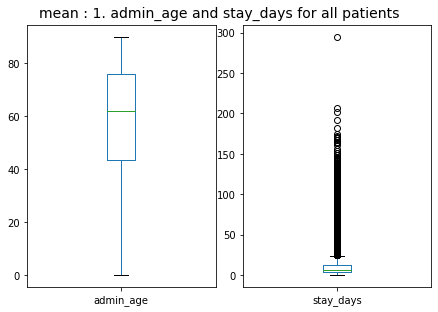

In [153]:
# box plot
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
# analyse the data visually, box plots
p.plot(kind='box', subplots=True, layout=(1,2), sharex=False, sharey=False)
plt.tight_layout(pad=0.4, w_pad=0.1, h_pad=2.0)
plt.suptitle("mean : 1. admin_age and stay_days for all patients", y=1.05, fontsize=14)
plt.show()

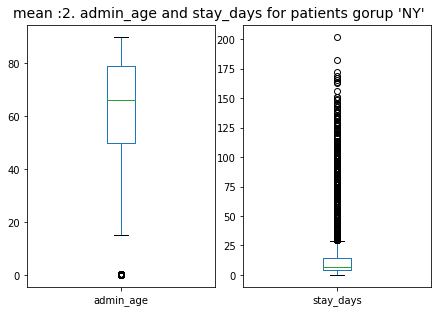

In [154]:
# box plot
# analyse the data visually, box plots
p1.plot(kind='box', subplots=True, layout=(1,2), sharex=False, sharey=False)
plt.tight_layout(pad=0.4, w_pad=0.1, h_pad=2.0)
plt.suptitle("mean :2. admin_age and stay_days for patients gorup 'NY'", y=1.05, fontsize=14)
plt.show()

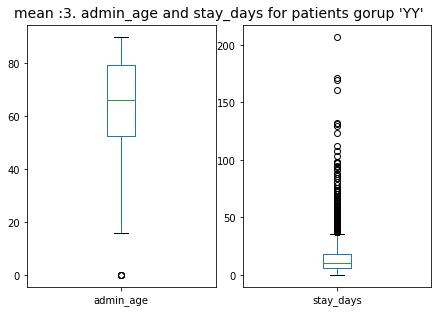

In [155]:
# box plot
# analyse the data visually, box plots
p2.plot(kind='box', subplots=True, layout=(1,2), sharex=False, sharey=False)
plt.tight_layout(pad=0.4, w_pad=0.1, h_pad=2.0)
plt.suptitle("mean :3. admin_age and stay_days for patients gorup 'YY'", y=1.05, fontsize=14)
plt.show()

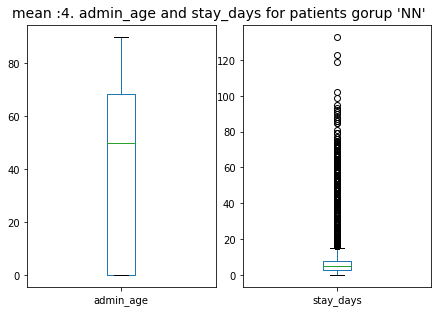

In [156]:
# box plot
# analyse the data visually, box plots
p3.plot(kind='box', subplots=True, layout=(1,2), sharex=False, sharey=False)
plt.tight_layout(pad=0.4, w_pad=0.1, h_pad=2.0)
plt.suptitle("mean :4. admin_age and stay_days for patients gorup 'NN'", y=1.05, fontsize=14)
plt.show()

In [ ]:
# Kruskal-Wallis Test : NY, NN, YY+YN, mixed

In [157]:
#ED_patient_cohortF_icd_notes
out=ED_patient_cohortF_icd_notes

In [158]:
# select data : admin_age 
#['ED_G2'].isin (["NY","YY_YN","NN","mixed"])]

p1=out.loc[(out['ED_G2']== 'NY'), ['admin_age']]
p2=out.loc[(out['ED_G2']== 'YY_YN'), ['admin_age']]
p3=out.loc[(out['ED_G2']== 'NN'), ['admin_age']]
p4=out.loc[(out['ED_G2']== 'mixed'), ['admin_age']]


from scipy import stats

#perform Kruskal-Wallis Test 
stats.kruskal(p1, p2, p3,p4)


KruskalResult(statistic=20041.33551476283, pvalue=0.0)

In [159]:
stats.kruskal(p1, p2)

KruskalResult(statistic=0.183741769988722, pvalue=0.668177148283863)

In [160]:
p=out[['admin_age','stay_days']]
p

,admin_age,stay_days
0,90.00,5.0
1,90.00,5.0
2,90.00,5.0
3,90.00,5.0
4,90.00,5.0
...,...,...
651042,57.86,8.0
651043,57.86,8.0
651044,57.86,8.0
651045,57.86,8.0


The Kruskal-Wallis Test uses the following null and alternative hypotheses:

The null hypothesis (H0): The median is equal across all groups.

The alternative hypothesis: (Ha): The median is not equal across all groups.

In this case, the test statistic is 4702 and the corresponding p-value is 0.0. Since this p-value is less than 0.05, we can reject the null hypothesis that the median age is the same for all three grops. 


In [161]:
#calculate interquartile range of values in the 'points' column : AGE
#q75, q25 = np.percentile(df['points'], [75 ,25])

q75_1,q50_1, q25_1 = np.percentile(out.loc[(out['ED_G2']== 'NY'), ['admin_age']], [75, 50, 25])
q75_2, q50_2,q25_2 = np.percentile(out.loc[(out['ED_G2']== 'YY_YN'), ['admin_age']], [75,50,25])
q75_3, q50_3,q25_3 = np.percentile(out.loc[(out['ED_G2']== 'NN'), ['admin_age']], [75,50,25])
q75_4, q50_4,q25_4 = np.percentile(out.loc[(out['ED_G2']== 'mixed'), ['admin_age']], [75,50,25])
iqr_1 = q75_1 - q25_1
iqr_2 = q75_2 - q25_2
iqr_3 = q75_3 - q25_3
iqr_4 = q75_4 - q25_4
#NY
print("NY IQR :",iqr_1,",Q75 :",q75_1,",Q50 :",q50_1,",Q25 :",q25_1)
#YY
print("YY_YN IQR :",iqr_2,",Q75 :",q75_2,",Q50 :",q50_2,",Q25 :",q25_2)
#NN
print("NN IQR :",iqr_3,",Q75 :",q75_3,",Q50 :",q50_3,",Q25 :",q25_3)
#mixed
print("mixed IQR :",iqr_4,",Q75 :",q75_4,",Q50 :",q50_4,",Q25 :",q25_4)

NY IQR : 26.67 ,Q75 : 80.06 ,Q50 : 68.39 ,Q25 : 53.39
YY_YN IQR : 25.35 ,Q75 : 79.42 ,Q50 : 67.25 ,Q25 : 54.07
NN IQR : 44.53 ,Q75 : 73.83 ,Q50 : 60.39 ,Q25 : 29.3
mixed IQR : 22.67 ,Q75 : 77.23 ,Q50 : 66.01 ,Q25 : 54.56


In [162]:
#ED_patient_cohortF_icd_notes

# Mann-Whitney U test
from scipy.stats import mannwhitneyu

def Wutest2(c):
    #G_NY = df2.query('icd_notes == "NY"')[c]
    #G_YY = df2.query('icd_notes == "YY"')[c]
    G_NY = df2.loc[(df2['ED_G2']== 'NY'), [c]]
    G_YY_YN = df2.loc[(df2['ED_G2']== 'YY_YN'), [c]]
    s, p= stats.mannwhitneyu(G_NY, G_YY_YN)
    #s=m.statistic
    #p=m.pvalue
    print(mannwhitneyu(G_NY, G_YY_YN))
    #print(name=[df2.columns[x]])
    #print(zip(name,s,p))
    print('\t MW U test statistics: ', s, 'with p-value: ', p) 

In [163]:
df2=out
Wutest2('admin_age')

MannwhitneyuResult(statistic=7993432803.5, pvalue=0.33408858292007876)
	 MW U test statistics:  7993432803.5 with p-value:  0.33408858292007876


In [164]:
# select data : stay_days

p1=out.loc[(out['ED_G2']== 'NY'), ['stay_days']]
p2=out.loc[(out['ED_G2']== 'YY_YN'), ['stay_days']]
p3=out.loc[(out['ED_G2']== 'NN'), ['stay_days']]
p4=out.loc[(out['ED_G2']== 'mixed'), ['stay_days']]


from scipy import stats
#perform Kruskal-Wallis Test 
stats.kruskal(p1, p2, p3,p4)


KruskalResult(statistic=34750.544350392425, pvalue=0.0)

In [165]:
pb=stats.kruskal(p1, p2)
print(pb)
round(pb.pvalue,3)

KruskalResult(statistic=5213.8175486304335, pvalue=0.0)


0.0

In [166]:
#calculate interquartile range of values in the 'points' column : Stay_days
#q75, q25 = np.percentile(df['points'], [75 ,25])

q75_1, q50_1, q25_1 = np.percentile(out.loc[(out['ED_G2']== 'NY'), ['stay_days']], [75, 50,25])
q75_2, q50_2, q25_2 = np.percentile(out.loc[(out['ED_G2']== 'YY_YN'), ['stay_days']], [75, 50,25])
q75_3, q50_3, q25_3 = np.percentile(out.loc[(out['ED_G2']== 'NN'), ['stay_days']], [75, 50,25])
q75_4, q50_4,q25_4 = np.percentile(out.loc[(out['ED_G2']== 'mixed'), ['stay_days']], [75,50,25])
iqr_1 = q75_1 - q25_1
iqr_2 = q75_2 - q25_2
iqr_3 = q75_3 - q25_3
iqr_4 = q75_4 - q25_4


#NY
print("NY IQR :",iqr_1,",Q75 :",q75_1,",Q50 :",q50_1,",Q25 :",q25_1)
#YY
print("YY_YN IQR :",iqr_2,",Q75 :",q75_2,",Q50 :",q50_2,",Q25 :",q25_2)
#NN
print("NN IQR :",iqr_3,",Q75 :",q75_3,",Q50 :",q50_3,",Q25 :",q25_3)
#mixed
print("mixed IQR :",iqr_4,",Q75 :",q75_4,",Q50 :",q50_4,",Q25 :",q25_4)

NY IQR : 11.0 ,Q75 : 16.0 ,Q50 : 9.0 ,Q25 : 5.0
YY_YN IQR : 14.0 ,Q75 : 21.0 ,Q50 : 12.0 ,Q25 : 7.0
NN IQR : 6.0 ,Q75 : 10.0 ,Q50 : 6.0 ,Q25 : 4.0
mixed IQR : 10.0 ,Q75 : 15.0 ,Q50 : 8.0 ,Q25 : 5.0


In [167]:
#ED_patient_cohortF_icd_notes

# Mann-Whitney U test
from scipy.stats import mannwhitneyu

def Wutest2(c):
    #G_NY = df2.query('icd_notes == "NY"')[c]
    #G_YY = df2.query('icd_notes == "YY"')[c]
    G_NY = df2.loc[(df2['ED_G2']== 'NY'), [c]]
    G_YY_YN = df2.loc[(df2['ED_G2']== 'YY_YN'), [c]]
    s, p= stats.mannwhitneyu(G_NY, G_YY_YN)
    #s=m.statistic
    #p=m.pvalue
    print(mannwhitneyu(G_NY, G_YY_YN))
    #print(name=[df2.columns[x]])
    #print(zip(name,s,p))
    print('\t MW U test statistics: ', s, 'with p-value: ', p) 

In [168]:
df2=out
Wutest2('stay_days')

MannwhitneyuResult(statistic=6508723307.0, pvalue=0.0)
	 MW U test statistics:  6508723307.0 with p-value:  0.0


####  2)Comparison between NY and YY (admissions)

In [2]:
##test NY Vs YY

In [169]:
# 1. all cuis descriptions
import pandas as pd
df2 = pd.read_csv(DATA_DIR + "III_21.F.ED_patient_cui_type_var_summary.csv")

In [170]:
df2.head()

,Unnamed: 0,ED_G,subject_id,hadm_id,Unnamed: 0.1,ED_Congenital Abnormality,ED_Disease or Syndrome,ED_Finding,ED_Injury or Poisoning,ED_Mental or Behavioral Dysfunction,...,No_Sign or Symptom,No_Social Behavior,No_Spatial Concept,No_Substance,No_Temporal Concept,No_Therapeutic or Preventive Procedure,No_Tissue,No_Vertebrate,No_Virus,No_Vitamin
0,0,NY,3,145834,0,0.0,0.0,0.0,0.0,0.0,...,29.0,4.0,233.0,6.0,205.0,79.0,1.0,0.0,0.0,5.0
1,1,NY,9,150750,1,0.0,0.0,3.0,0.0,0.0,...,31.0,9.0,91.0,7.0,137.0,45.0,8.0,0.0,0.0,0.0
2,2,NY,12,112213,2,0.0,0.0,0.0,0.0,4.0,...,40.0,1.0,34.0,0.0,61.0,54.0,1.0,0.0,0.0,1.0
3,3,NY,18,188822,3,0.0,0.0,3.0,0.0,4.0,...,28.0,4.0,13.0,0.0,95.0,29.0,0.0,0.0,0.0,1.0
4,4,NY,19,109235,4,0.0,0.0,1.0,0.0,2.0,...,4.0,2.0,123.0,2.0,68.0,22.0,12.0,0.0,0.0,1.0


#### 2)Checking the Normality of Data and  Levene’s test to test for homogeneity of variances (equal variances) 

In [ ]:
# T-test with SciPy 
# ref: https://www.marsja.se/how-to-perform-a-two-sample-t-test-with-python-3-different-methods/

from scipy import stats
# Checking the Normality of Data

# Subset data
#male = df.query('grouping == "men"')['height']
#female = df.query('grouping == "women"')['height']

# we performed the Shapiro-Wliks test on both Pandas series 
#(i.e., for each group seperately). Consequently, we get a tuple, for each time we use the shapiro method. 
#This tuple contains the test statistics and the p-value. 
#Here, the null hypothesis is that the data follows a normal distribution. 
#Thus, we can infer that the data from both groups is normally distributed.
#stats.shapiro(male)
#stats.shapiro(female)

#before carrying out a t-test in Python, 
#we also need to make sure that the variances in the two groups are equal. Here we’ll use Levene’s 
#test to test for homogeneity of variances (equal variances) and this can be performed with the function levene as follow:
# Checking the Homogeneity of Variances Assumption 
#stats.levene(male, female)

In [171]:
from scipy import stats
#ED_patient_cohortF_icd_notes

def check(c):
    G_NY = df2.query('ED_G == "NY"')[c]
    G_YY = df2.query('ED_G == "YY"')[c]
    print(stats.shapiro(G_NY))
    print(stats.shapiro(G_YY))
    print(stats.levene(G_NY, G_YY))
    t2, p2 = stats.ttest_ind(G_NY,G_YY)
    mean_by_G = df2.groupby('ED_G')[c].mean()
    print(c)
    print('\t Mean for those who are NY: ',mean_by_G['NY'])
    print('\t Mean for those who are YY: ',mean_by_G['YY'])
    print('\t t test statistics: ', t2, 'with p-value: ', p2)


In [172]:
check(df2.columns[4]) 

(0.9549266695976257, 0.0)
(0.9548936486244202, 1.568141437443274e-31)
LeveneResult(statistic=7550.942626571656, pvalue=0.0)
Unnamed: 0.1
	 Mean for those who are NY:  11733.5
	 Mean for those who are YY:  25208.5
	 t test statistics:  -117.17459748286802 with p-value:  0.0


/home/ubuntu/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# normality and equal variance test

In [173]:
# normality and equal variance test
for x in range(4,df2.shape[1]):
#for x in range(7,30):
    c=df2.columns[x]
    G_NY = df2.query('ED_G == "NY"')[c]
    G_YY = df2.query('ED_G == "YY"')[c]
    print(stats.shapiro(G_NY))
    print(stats.shapiro(G_YY))
    print(stats.levene(G_NY, G_YY))

(0.9549266695976257, 0.0)
(0.9548936486244202, 1.568141437443274e-31)
LeveneResult(statistic=7550.942626571656, pvalue=0.0)
(0.0007739067077636719, 0.0)
(1.0, 1.0)
LeveneResult(statistic=0.14836756277101085, pvalue=0.7001033204087709)
(0.07262200117111206, 0.0)
(0.1996227502822876, 0.0)
LeveneResult(statistic=575.3135047844232, pvalue=8.183528591253493e-126)
(0.20108634233474731, 0.0)
(0.23587429523468018, 0.0)
LeveneResult(statistic=141.46806686578142, pvalue=1.5334809476337102e-32)
(0.05015498399734497, 0.0)
(0.13952332735061646, 0.0)
LeveneResult(statistic=37.31524141970758, pvalue=1.0187119505563922e-09)
(0.18244636058807373, 0.0)
(0.3315168619155884, 0.0)
LeveneResult(statistic=899.275950945291, pvalue=2.2073427078430732e-194)


/home/ubuntu/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


(0.017955660820007324, 0.0)
(0.04654127359390259, 0.0)
LeveneResult(statistic=84.75705568674476, pvalue=3.6113653624621757e-20)
(0.31446677446365356, 0.0)
(0.3062793016433716, 0.0)
LeveneResult(statistic=398.7070930664361, pvalue=4.568805714573191e-88)
(0.33218997716903687, 0.0)
(0.29407596588134766, 0.0)
LeveneResult(statistic=34.08337350690087, pvalue=5.3405465063554965e-09)
(0.41977089643478394, 0.0)
(0.4287230372428894, 0.0)
LeveneResult(statistic=182.46303734064236, pvalue=1.9171442727102428e-41)
(0.18175113201141357, 0.0)
(0.126339852809906, 0.0)
LeveneResult(statistic=90.20865631361629, pvalue=2.3147435538647018e-21)
(0.09571045637130737, 0.0)
(0.10813570022583008, 0.0)
LeveneResult(statistic=0.38165681682323116, pvalue=0.5367230876970963)
(0.26124459505081177, 0.0)
(0.24983817338943481, 0.0)
LeveneResult(statistic=3.556050830795604, pvalue=0.059339477293765965)
(0.0028718113899230957, 0.0)
(1.0, 1.0)
LeveneResult(statistic=0.6677536249904275, pvalue=0.413843117747245)
(0.301237

In [21]:
#Here, the null hypothesis is that the data follows a normal distribution. 
#Thus, we can infer that the data from both groups is not normally distributed.( reject null hypothesis)
# the p-value suggests that the data does not follow the assumption of equal variances. 


#### 3) Mann-Whitney U test

In [174]:
#ED_patient_cohortF_icd_notes

# Mann-Whitney U test
from scipy.stats import mannwhitneyu

def Wutest2(c):
    #G_NY = df2.query('icd_notes == "NY"')[c]
    #G_YY = df2.query('icd_notes == "YY"')[c]
    G_NY = df2.loc[(df2['ED_G']== 'NY'), [c]]
    G_YY = df2.loc[(df2['ED_G']== 'YY'), [c]]
    s, p= stats.mannwhitneyu(G_NY, G_YY)
    #s=m.statistic
    #p=m.pvalue
    print(mannwhitneyu(G_NY, G_YY))
    #print(name=[df2.columns[x]])
    #print(zip(name,s,p))
    print('\t MW U test statistics: ', s, 'with p-value: ', p) 


In [175]:
w= Wutest2(df2.columns[7]) 

MannwhitneyuResult(statistic=37277952.0, pvalue=4.855444750060325e-26)
	 MW U test statistics:  37277952.0 with p-value:  4.855444750060325e-26


In [176]:
df2.shape[1]
df2.columns[4]

'Unnamed: 0.1'

In [177]:
# https://www.marsja.se/how-to-perform-mann-whitney-u-test-in-python-with-scipy-and-pingouin/
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
#1. create cui data frame
#column_names = ["name", "l_ny","l_yy", "m_ny", "m_yy","t_stat", "p_value"]
#column_names = ["name","m_ny", "m_yy", "t_stat", "p_value"]
#numpy.
column_names = ["name","stat", "p_value"]
Mu_p = pd.DataFrame(columns = column_names)
Mu_p

,name,stat,p_value


In [179]:
range(4,df2.shape[1])

range(4, 137)

In [180]:
# Mann-Whitney U test
from scipy.stats import mannwhitneyu

for x in range(4,df2.shape[1]):
#for x in range(7,30):
    c=df2.columns[x]
    G_NY = df2.loc[(df2['ED_G']== 'NY'), [c]]
    G_YY = df2.loc[(df2['ED_G']== 'YY'), [c]]
    s, p= stats.mannwhitneyu(G_NY, G_YY)
    print(c)
    print('\t test statistics: ', s, 'with p-value: ', p)
    name=[df2.columns[x]]
    i=pd.DataFrame(data = zip(name,[s],[p]), columns=['name','stat', 'p_value'])
    Mu_p=Mu_p.append(i) 

Unnamed: 0.1
	 test statistics:  0.0 with p-value:  0.0
ED_Congenital Abnormality
	 test statistics:  40856047.0 with p-value:  0.35008886342436535
ED_Disease or Syndrome
	 test statistics:  28472337.0 with p-value:  0.0
ED_Finding
	 test statistics:  37277952.0 with p-value:  4.855444750060325e-26
ED_Injury or Poisoning
	 test statistics:  38798852.5 with p-value:  2.922606439368036e-45
ED_Mental or Behavioral Dysfunction
	 test statistics:  19168039.0 with p-value:  0.0
ED_Pathologic Function
	 test statistics:  40094025.5 with p-value:  8.55015172776495e-49
ED_Sign or Symptom
	 test statistics:  34357756.5 with p-value:  9.625987454078074e-54
No_Acquired Abnormality
	 test statistics:  38535761.5 with p-value:  5.4195906215592526e-09
No_Activity
	 test statistics:  33789364.5 with p-value:  1.8036325128562953e-61
No_Age Group
	 test statistics:  38799034.0 with p-value:  9.862605161693572e-11
No_Amino Acid Sequence
	 test statistics:  40759609.5 with p-value:  0.1617437428145459
No_

In [29]:
Mu_p

,name,stat,p_value
0,ED_Congenital Abnormality,40856047.0,3.500889e-01
0,ED_Disease or Syndrome,28472337.0,0.000000e+00
0,ED_Finding,37277952.0,4.855445e-26
0,ED_Injury or Poisoning,38798852.5,2.922606e-45
0,ED_Mental or Behavioral Dysfunction,19168039.0,0.000000e+00
...,...,...,...
0,No_Therapeutic or Preventive Procedure,39804133.0,6.954263e-03
0,No_Tissue,32827703.5,1.369309e-81
0,No_Vertebrate,40856047.0,3.500889e-01
0,No_Virus,38593260.5,2.142024e-16


In [181]:
#6.6 Mu test :df ( cui semantic typeby group)
Mu_p.to_csv(DATA_DIR + "IV_22.6.F.ED_cui_Mu_p.csv", index=True)

In [182]:
# 2. ED cuis test NY Vs YY

print(df_ed.shape)
df_ed.head()

(63270, 140)


,Unnamed: 0,ED_G,type,subject_id,hadm_id,ED_cui,C0001957,C0001969,C0006107,C0006109,...,C2931917,C3508472,C3531755,C3840218,C3887612,C4024917,C4024937,C4024978,C4076763,C4511595
0,0,NY,Congenital Abnormality,89416,100985,ED,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0
1,1,NY,Disease or Syndrome,22,165315,ED,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,NY,Disease or Syndrome,31,128652,ED,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,NY,Disease or Syndrome,72,156857,ED,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,NY,Disease or Syndrome,78,100536,ED,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [183]:
df_ed.columns[6]

'C0001957'

In [184]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [185]:
df_ed.columns[139]

'C4511595'

In [186]:
#1. create cui data frame

column_names = ["name","stat", "p_value"]
Mu_p_ed = pd.DataFrame(columns = column_names)
Mu_p_ed

,name,stat,p_value


In [187]:
# Mann-Whitney U test
# Mu_p_ed
from scipy.stats import mannwhitneyu

for x in range(6,df_ed.shape[1]+1):
#for x in range(7,30):
    c=df_ed.columns[x]
    #G_NY = df2.query('icd_notes == "NY"')[c]
    #G_YY = df2.query('icd_notes == "YY"')[c]
    G_NY = df_ed.loc[(df_ed['ED_G']== 'NY'), [c]]
    G_YY = df_ed.loc[(df_ed['ED_G']== 'YY'), [c]]
    try:
        s, p= stats.mannwhitneyu(G_NY, G_YY)
        print(c)
        print('\t test statistics: ', s, 'with p-value: ', p)
        name=[df_ed.columns[x]]
        i=pd.DataFrame(data = zip(name,[s],[p]), columns=['name','stat', 'p_value'])
        Mu_p_ed=Mu_p_ed.append(i) 
    except:
        pass

C0001957
	 test statistics:  168740262.5 with p-value:  2.6494066751049115e-41
C0001969
	 test statistics:  171483353.0 with p-value:  0.28405265424101234
C0006107
	 test statistics:  171423881.0 with p-value:  0.0712571809340878
C0006109
	 test statistics:  171441076.0 with p-value:  1.5604460778059534e-06
C0006112
	 test statistics:  169912054.5 with p-value:  2.0005941520159502e-54
C0009176
	 test statistics:  171553640.0 with p-value:  0.3179211689015904
C0009178
	 test statistics:  171533100.5 with p-value:  0.0760084029362122
C0009421
	 test statistics:  170808803.0 with p-value:  1.5486975686558756e-06
C0009676
	 test statistics:  160970074.0 with p-value:  2.7742386899057126e-36
C0011206
	 test statistics:  152104071.5 with p-value:  0.0
C0011253
	 test statistics:  171072519.0 with p-value:  4.146011323639195e-06
C0016579
	 test statistics:  171552848.0 with p-value:  0.23409522894000856
C0018524
	 test statistics:  167804548.5 with p-value:  9.320273035091782e-31
C0018845
	 t

IndexError: index 140 is out of bounds for axis 0 with size 140

In [43]:
Mu_p_ed

,name,stat,p_value
0,C0001957,168740262.5,2.649407e-41
0,C0001969,171483353.0,2.840527e-01
0,C0006107,171423881.0,7.125718e-02
0,C0006109,171441076.0,1.560446e-06
0,C0006112,169912054.5,2.000594e-54
...,...,...,...
0,C4024917,171566280.0,3.195501e-01
0,C4024937,171531128.0,1.283622e-03
0,C4024978,171566280.0,3.195501e-01
0,C4076763,171399203.0,1.848868e-06


In [44]:
#6.7 Mu_p_ed-test :df ( significantly fifferent Ed cuis by group)
Mu_p_ed.to_csv(DATA_DIR + "III_22.7.F.ED_cui_Mu_p_ed.csv", index=True)

In [188]:
# 3.  ED_cohort  t-test : age, etc
ED_cohort_G = ED_patient_cohortF_icd_notes

In [189]:
ED_cohort_G.loc[(ED_cohort_G['ED_G']== 'NY'), ['admin_age']]

,admin_age
35,73.49
36,73.49
37,73.49
38,73.49
39,73.49
...,...
651027,26.41
651028,28.01
651035,31.58
651036,31.58


In [190]:
#'admin_age'
G_NY = ED_cohort_G.loc[(ED_cohort_G['ED_G']== 'NY'), ['admin_age']]
G_YY = ED_cohort_G.loc[(ED_cohort_G['ED_G']== 'YY'), ['admin_age']]
print(stats.shapiro(G_NY))
print(stats.shapiro(G_YY))
#stats.levene(G_NY, G_YY)
s, p= stats.mannwhitneyu(G_NY, G_YY)
mean_by_G = ED_cohort_G.groupby('ED_G')['admin_age'].mean()
print('\t mwU test statistics: ', s, 'with p-value: ', p)
print('\t Mean for those who are NY: ',mean_by_G['NY'])
print('\t Mean for those who are YY: ',mean_by_G['YY'])

(0.8882724046707153, 0.0)
(0.9620267748832703, 0.0)
	 mwU test statistics:  7521417151.0 with p-value:  0.41630904300618454
	 Mean for those who are NY:  63.64039102298021
	 Mean for those who are YY:  65.53637471939331


/home/ubuntu/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [191]:
#stay_days
G_NY = ED_cohort_G.loc[(ED_cohort_G['ED_G']== 'NY'), ['stay_days']]
G_YY = ED_cohort_G.loc[(ED_cohort_G['ED_G']== 'YY'), ['stay_days']]
print(stats.shapiro(G_NY))
print(stats.shapiro(G_YY))
#stats.levene(G_NY, G_YY)
s, p= stats.mannwhitneyu(G_NY, G_YY)
mean_by_G = ED_cohort_G.groupby('ED_G')['stay_days'].mean()
print('\t mwU test statistics: ', s, 'with p-value: ', p)
print('\t Mean for those who are NY: ',mean_by_G['NY'])
print('\t Mean for those who are YY: ',mean_by_G['YY'])

(0.6384209990501404, 0.0)
(0.6932486295700073, 0.0)
	 mwU test statistics:  6068403163.0 with p-value:  0.0
	 Mean for those who are NY:  13.731451128860982
	 Mean for those who are YY:  16.80091521326196


In [ ]:
### ANalysis : gender, Ethnicity, 
# Location of the patient previous to ICU admission: Table ADMISSIONS / ADMISSION_LOCATION
# Service where the patient was admitted to: Table SERVICES
# Mortality : Table PATIENTS / EXPIRE_FLAG
# Number of ICD9 codes at 2 time points: at admission and at discharge. 
# The objective is to explore the complexity of the patient in terms of co-morbidity. 

#### 4) Mann-Whitney U test significant difference Cui description and ED cuis between NY and YY

In [ ]:
## check semanctic type and its cuis having significant difference between YY nd NY

In [192]:
# import
import numpy as np
import pandas as pd

Mu_p = pd.read_csv(DATA_DIR + "IV_22.6.F.ED_cui_Mu_p.csv")
#6.7 t-test :df ( significantly fifferent Ed cuis by group)
Mu_p_ed= pd.read_csv(DATA_DIR + "III_22.7.F.ED_cui_Mu_p_ed.csv")

In [193]:
# 1.0 semanctic type significantly different from Mu_p
sig_dif_Mu_p=Mu_p[Mu_p.p_value <0.05]
print(len(sig_dif_Mu_p))
print(len(Mu_p))
sig_dif_Mu_p

115
133


,Unnamed: 0,name,stat,p_value
0,0,Unnamed: 0.1,0.0,0.000000e+00
2,0,ED_Disease or Syndrome,28472337.0,0.000000e+00
3,0,ED_Finding,37277952.0,4.855445e-26
4,0,ED_Injury or Poisoning,38798852.5,2.922606e-45
5,0,ED_Mental or Behavioral Dysfunction,19168039.0,0.000000e+00
...,...,...,...,...
127,0,No_Temporal Concept,35526729.5,7.510920e-36
128,0,No_Therapeutic or Preventive Procedure,39804133.0,6.954263e-03
129,0,No_Tissue,32827703.5,1.369309e-81
131,0,No_Virus,38593260.5,2.142024e-16


In [194]:
# 1.2 semanctic type no difference
no_dif=Mu_p[Mu_p.p_value > 0.1]
no_dif

,Unnamed: 0,name,stat,p_value
1,0,ED_Congenital Abnormality,40856047.0,0.350089
11,0,No_Amino Acid Sequence,40759609.5,0.161744
12,0,"No_Amino Acid, Peptide, or Protein",40735422.5,0.357569
13,0,No_Amphibian,40849083.0,0.194529
16,0,No_Animal,40849918.0,0.444757
34,0,No_Cell or Molecular Dysfunction,40707797.0,0.135199
55,0,No_Experimental Model of Disease,40842240.0,0.318123
56,0,No_Family Group,40740913.5,0.392388
58,0,No_Fish,40807749.0,0.387240
59,0,No_Food,40675528.5,0.334010


In [195]:
len(no_dif)

15

In [196]:
#2.1 ed cuis significantly different
sig_dif_ed=Mu_p_ed[Mu_p_ed.p_value <0.001]
print(len(sig_dif_ed))
print(len(Mu_p_ed))
sig_dif_ed.head()

34
129


,Unnamed: 0,name,stat,p_value
0,0,C0001957,168740262.5,2.649407e-41
3,0,C0006109,171441076.0,1.560446e-06
4,0,C0006112,169912054.5,2.000594e-54
7,0,C0009421,170808803.0,1.548698e-06
8,0,C0009676,160970074.0,2.774239e-36


In [78]:
# check cui names

In [197]:
from py2neo import Node, Relationship, Graph
# from igraph import Graph as iGraph

In [198]:
graph = Graph("http://10.200.112.233:7474/db/data/", user="scarlett", password="Admin123")

In [199]:
# {id:'""" + cui + """' }
#  RETURN p.cui, p.name, """
def cui2name(cui):
    query = """
        MATCH (p:Concepts{id:'""" + cui + """' })
        RETURN p.name"""
    return (graph.run(query).to_series()).tolist()


In [200]:
sig_dif_ed['Cname']=sig_dif_ed['name'].apply(lambda x: cui2name(x))

<ipython-input-200-276982c7f966>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_dif_ed['Cname']=sig_dif_ed['name'].apply(lambda x: cui2name(x))


In [201]:
print(sig_dif_ed.shape)
sig_dif_ed.head()

(34, 5)


,Unnamed: 0,name,stat,p_value,Cname
0,0,C0001957,168740262.5,2.649407e-41,[Alcohol Withdrawal Delirium]
3,0,C0006109,171441076.0,1.560446e-06,"[Brain Damage, Chronic]"
4,0,C0006112,169912054.5,2.000594e-54,"[Brain Diseases, Metabolic]"
7,0,C0009421,170808803.0,1.548698e-06,[Comatose]
8,0,C0009676,160970074.0,2.774239e-36,[Confusion]


In [202]:
sig_dif_ed.to_csv(DATA_DIR + "III_22.7.F_name.ED_cui_Mu_p_ed_name.csv", index=True)

In [203]:
#2.2 ed cuis no different
no_dif_ed=Mu_p_ed[Mu_p_ed.p_value >0.1]
print(len(no_dif_ed))
print(len(Mu_p_ed))
no_dif_ed.head()

63
129


,Unnamed: 0,name,stat,p_value
1,0,C0001969,171483353.0,0.284053
5,0,C0009176,171553640.0,0.317921
11,0,C0016579,171552848.0,0.234095
13,0,C0018845,171566280.0,0.319550
14,0,C0019147,171555220.0,0.119800


In [56]:
# 2. ED cuis
import numpy as np
import pandas as pd
#import ED cuis 
#df2.to_csv('/home/ubuntu/Scarlett/Output_F/III_20.2.F ED_patient_EDcui_var.csv', index=True)
df_ed = pd.read_csv(DATA_DIR + "III_20.2.F ED_patient_EDcui_var.csv")

df_ed.head()

,Unnamed: 0,ED_G,type,subject_id,hadm_id,ED_cui,C0001957,C0001969,C0006107,C0006109,...,C2931917,C3508472,C3531755,C3840218,C3887612,C4024917,C4024937,C4024978,C4076763,C4511595
0,0,NY,Congenital Abnormality,89416,100985,ED,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0
1,1,NY,Disease or Syndrome,22,165315,ED,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,NY,Disease or Syndrome,31,128652,ED,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,NY,Disease or Syndrome,72,156857,ED,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,NY,Disease or Syndrome,78,100536,ED,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# c: df_ed.columns[x]
#df_ed.iloc[df_ed.columns[6:df_ed.shape[1]]]
#dif_ed_list = dif_ed['name'].unique().tolist()
dif_ed_list = df_ed.columns[6:df_ed.shape[1]]
dif_ed_list


Index(['C0001957', 'C0001969', 'C0006107', 'C0006109', 'C0006112', 'C0009176',
       'C0009178', 'C0009421', 'C0009676', 'C0011206',
       ...
       'C2931917', 'C3508472', 'C3531755', 'C3840218', 'C3887612', 'C4024917',
       'C4024937', 'C4024978', 'C4076763', 'C4511595'],
      dtype='object', length=134)

In [58]:
len(dif_ed_list)

134

In [85]:
s_dif_ed_list = sig_dif_ed['name'].unique().tolist()
len(s_dif_ed_list)
list2=s_dif_ed_list

In [86]:
#s_dif_ed_list
list2.insert(0,'hadm_id')

In [87]:
list2.insert(1,'ED_G')

In [88]:
len(list2)

36

In [90]:
#sig_dif_ed['name'].unique().tolist()
#s_dif_ed_list

In [91]:
# keep only cuis with difference between NY and YY
temp=df_ed.loc[:, list2]

In [92]:
temp.head()

,hadm_id,ED_G,C0001957,C0006109,C0006112,C0009421,C0009676,C0011206,C0011253,C0018524,...,C0338791,C0852400,C1285577,C1306587,C1319200,C1456784,C1838578,C2062728,C2931917,C4076763
0,100985,NY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,165315,NY,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128652,NY,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,156857,NY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100536,NY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
temp2=temp[temp['ED_G'].isin (["NY","YY"])]


In [ ]:
# all cuis
import numpy as np
import pandas as pd
#import ED cuis 
#df2.to_csv('/home/ubuntu/Scarlett/Output_F/III_20.2.F ED_patient_EDcui_var.csv', index=True)

df_all_cui_1= pd.read_csv(DATA_DIR + "III_20.2.1.F ED_patient_allcui_var_summary_1.csv")
df_all_cui_2= pd.read_csv(DATA_DIR + "III_20.2.2.F ED_patient_allcui_var_summary_2.csv")
df_all_cui_3= pd.read_csv(DATA_DIR + "III_20.2.3.F ED_patient_allcui_var_summary_3.csv")
df_all_cui_4= pd.read_csv(DATA_DIR + "III_20.2.4.F ED_patient_allcui_var_summary_4.csv")
df_all_cui_5= pd.read_csv(DATA_DIR + "III_20.2.5.F ED_patient_allcui_var_summary_5.csv")
df_all_cui_6= pd.read_csv(DATA_DIR + "III_20.2.6.F ED_patient_allcui_var_summary_6.csv")
df_all_cui_7= pd.read_csv(DATA_DIR + "III_20.2.7.F ED_patient_allcui_var_summary_7.csv")


In [92]:
# df_all_cui_1
df_all_cui_1
temp_1 = df_all_cui_1
#temp_2=temp_1[temp_1['ED_G'].isin (["NY","YY","NN","YN"])]
temp_2=temp_1[temp_1['ED_G'].isin (["NY","YY"])]


In [93]:
df_all_cui_1.head()

,Unnamed: 0,ED_G,subject_id,hadm_id,ED_cui,C0000618,C0000726,C0000729,C0000731,C0000737,...,C4534555,C4534556,C4539602,C4539801,C4539836,C4543303,C4546143,C4546541,C4547399,C4551285
0,0,NY,3,145834,ED,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,NY,3,145834,No,0.0,12.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,NY,9,150750,ED,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,NY,9,150750,No,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,NY,12,112213,ED,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
print(temp_2.columns[5])
#df_all_cui_1.shape[1]
temp_2.columns[df_all_cui_1.shape[1]-1]

C0000618


'C4551285'

In [97]:
df_all_cui_1_list = temp_2.columns[5:temp_2.shape[1]-1]
df_all_cui_1_list

Index(['C0000618', 'C0000726', 'C0000729', 'C0000731', 'C0000737', 'C0000768',
       'C0000832', 'C0000833', 'C0000921', 'C0000924',
       ...
       'C4534547', 'C4534555', 'C4534556', 'C4539602', 'C4539801', 'C4539836',
       'C4543303', 'C4546143', 'C4546541', 'C4547399'],
      dtype='object', length=9999)

In [98]:
#1. create cui data frame

column_names = ["name","stat", "p_value"]
Mu_p_all = pd.DataFrame(columns = column_names)
Mu_p_all

,name,stat,p_value


In [99]:
# 2.Mann-Whitney U test
# Mu_p_ed
from scipy.stats import mannwhitneyu

for x in range(5,temp_2.shape[1]+1):
#for x in range(7,30):
    c=temp_2.columns[x]
    #G_NY = df2.query('icd_notes == "NY"')[c]
    #G_YY = df2.query('icd_notes == "YY"')[c]
    G_NY = temp_2.loc[(temp_2['ED_G']== 'NY'), [c]]
    G_YY = temp_2.loc[(temp_2['ED_G']== 'YY'), [c]]
    try:
        s, p= stats.mannwhitneyu(G_NY, G_YY)
        print(c)
        print('\t test statistics: ', s, 'with p-value: ', p)
        name=[temp_2.columns[x]]
        i=pd.DataFrame(data = zip(name,[s],[p]), columns=['name','stat', 'p_value'])
        Mu_p_all=Mu_p_all.append(i) 
    except:
        pass

C0000618
	 test statistics:  161143540.0 with p-value:  0.16660963906741694
C0000726
	 test statistics:  158876363.0 with p-value:  0.01857720794584337
C0000729
	 test statistics:  161045448.0 with p-value:  0.16420872632731082
C0000731
	 test statistics:  157646326.5 with p-value:  1.0801668402163687e-14
C0000737
	 test statistics:  155595740.5 with p-value:  1.8418035646328267e-17
C0000768
	 test statistics:  159465548.5 with p-value:  9.535397973497933e-08
C0000832
	 test statistics:  161058886.5 with p-value:  0.008760186317529879
C0000833
	 test statistics:  158186089.5 with p-value:  1.2710049053121642e-11
C0000921
	 test statistics:  156754248.0 with p-value:  1.468577231407893e-28
C0000924
	 test statistics:  161131649.0 with p-value:  0.3609167767704563
C0000925
	 test statistics:  161177128.0 with p-value:  0.48298766883860167
C0000938
	 test statistics:  158492327.0 with p-value:  4.664703039123807e-13
C0000970
	 test statistics:  157198700.0 with p-value:  1.328479538021903

KeyboardInterrupt: 

In [ ]:
#2.1 ed cuis significantly different
sig_dif_all=Mu_p_all[Mu_p_all.p_value <0.05]
print(len(sig_dif_all))
print(len(Mu_p_all))
sig_dif_all.head()